##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

# Pix2Pix

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/pix2pix"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/pix2pix.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/pix2pix.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/pix2pix.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Import TensorFlow and other libraries

In [2]:
!pip install -q -U tensorboard

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:

  pass

import os
import glob
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import tensorflow as tf
import cv2
from tqdm import tqdm
from IPython import display

from os.path import dirname, join as pjoin
import scipy.io as sio
import mat73
import h5py
import matplotlib.image as mpimg
from skimage import measure
import pandas as pd

## Load the dataset

You can download this dataset and similar datasets from [here](https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets). As mentioned in the [paper](https://arxiv.org/abs/1611.07004) we apply random jittering and mirroring to the training dataset.

* In random jittering, the image is resized to `286 x 286` and then randomly cropped to `256 x 256`
* In random mirroring, the image is randomly flipped horizontally i.e left to right.

* load mat file

In [7]:
if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device: /device:GPU:0
2.4.1


### iterate all finenames in the folder into a queue

In [4]:
train_name = list()
datadir='/home/hzhuge/Documents/phantom_stack/phantom_slide_stack/'
for file in os.listdir(datadir):
    if file.endswith(".mat"):
        file_name=os.path.join(datadir,file)
        train_name.append(file_name)

### load dataset into tfrecord

In [5]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

tfrecords_filename = 'phantom_slide_train.tfrecords'

writer = tf.io.TFRecordWriter(tfrecords_filename)

for img_path in train_name:
    mat_contents = sio.loadmat(img_path)
    image = mat_contents['newI']
    w = image.shape[1]

    w = w // 2
      
    real_data = image[:, :w,:]
    input_data = image[:, w:,:]
        
    
    input_string=input_data.tostring()
    real_string=real_data.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(w),
        'width': _int64_feature(w),
        'input': _bytes_feature(input_string),
        'target': _bytes_feature(real_string)}))
        
    writer.write(example.SerializeToString())

writer.close()


In [3]:
test_name = list()
datadir='/home/hzhuge/Documents/phantom_stack/temp/'
for file in os.listdir(datadir):
    if file.endswith(".mat"):
        file_name=os.path.join(datadir,file)
        test_name.append(file_name)

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

tfrecords_filename = 'phantom_slide_temp.tfrecords'

writer = tf.io.TFRecordWriter(tfrecords_filename)

for img_path in test_name:
    mat_contents = sio.loadmat(img_path)
    image = mat_contents['newI']
    w = image.shape[1]

    w = w // 2
      
    real_data = image[:, :w,:]
    input_data = image[:, w:,:]
        
    
    input_string=input_data.tostring()
    real_string=real_data.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(w),
        'width': _int64_feature(w),
        'input': _bytes_feature(input_string),
        'target': _bytes_feature(real_string)}))
        
    writer.write(example.SerializeToString())

writer.close()

In [3]:
test_name = list()
datadir='/home/hzhuge/Documents/phantom_stack/pollen_stack/'
for file in os.listdir(datadir):
    if file.endswith(".mat"):
        file_name=os.path.join(datadir,file)
        test_name.append(file_name)

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

tfrecords_filename = 'pollen_slide_test.tfrecords'

writer = tf.io.TFRecordWriter(tfrecords_filename)

for img_path in test_name:
    mat_contents = sio.loadmat(img_path)
    image = mat_contents['newI']
    w = image.shape[1]

    w = w // 2
      
    real_data = image[:, :w,:]
    input_data = image[:, w:,:]
        
    
    input_string=input_data.tostring()
    real_string=real_data.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(w),
        'width': _int64_feature(w),
        'input': _bytes_feature(input_string),
        'target': _bytes_feature(real_string)}))
        
    writer.write(example.SerializeToString())

writer.close()

In [26]:
test_name

['/home/hzhuge/Documents/phantom_stack/temp/phantom3d_2_sub6.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_3_sub4.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_3_sub35.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_2_sub4.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_2_sub33.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_2_sub18.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_3_sub3.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_3_sub24.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_4_sub19.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_1_sub32.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_3_sub36.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_2_sub12.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_3_sub18.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3d_3_sub29.mat',
 '/home/hzhuge/Documents/phantom_stack/temp/phantom3

In [5]:
test_name = list()
datadir='/home/hzhuge/Documents/phantom_stack/pollen_resize_stack/'
for file in os.listdir(datadir):
    if file.endswith(".mat"):
        file_name=os.path.join(datadir,file)
        test_name.append(file_name)

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

tfrecords_filename = 'pollen_slide_resize_test.tfrecords'

writer = tf.io.TFRecordWriter(tfrecords_filename)

for img_path in test_name:
    mat_contents = sio.loadmat(img_path)
    image = mat_contents['newI']
    w = image.shape[1]

    w = w // 2
      
    real_data = image[:, :w,:]
    input_data = image[:, w:,:]
        
    
    input_string=input_data.tostring()
    real_string=real_data.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(w),
        'width': _int64_feature(w),
        'input': _bytes_feature(input_string),
        'target': _bytes_feature(real_string)}))
        
    writer.write(example.SerializeToString())

writer.close()

In [2]:
test_name = list()
datadir='/home/hzhuge/Documents/phantom_stack/prostate_resize_stack/'
for file in os.listdir(datadir):
    if file.endswith(".mat"):
        file_name=os.path.join(datadir,file)
        test_name.append(file_name)

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

tfrecords_filename = 'prostate_slide_resize_test.tfrecords'

writer = tf.io.TFRecordWriter(tfrecords_filename)

for img_path in test_name:
    mat_contents = sio.loadmat(img_path)
    image = mat_contents['newI']
    w = image.shape[1]

    w = w // 2
      
    real_data = image[:, :w,:]
    input_data = image[:, w:,:]
        
    
    input_string=input_data.tostring()
    real_string=real_data.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(w),
        'width': _int64_feature(w),
        'input': _bytes_feature(input_string),
        'target': _bytes_feature(real_string)}))
        
    writer.write(example.SerializeToString())

writer.close()

### decode file from tfrecorder

In [8]:
BUFFER_SIZE = 300
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_STACK = 21

In [9]:
# normalizing the images to [-1, 1]

def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [10]:
def read_and_decode(serialized_example):
#     reader=tf.TFRecordReader()
#     _,serialized_example=reader.read(filename.queue)
    features=tf.io.parse_single_example(
      serialized_example,
      features={
          'height':tf.io.FixedLenFeature([],tf.int64),
          'width':tf.io.FixedLenFeature([],tf.int64),
          'input':tf.io.FixedLenFeature([],tf.string),
          'target':tf.io.FixedLenFeature([],tf.string)
      })
    
    height = tf.cast(features['height'], tf.int32)
    width = tf.cast(features['width'], tf.int32)
    
    input=tf.io.decode_raw(features['input'],tf.uint8)
    target=tf.io.decode_raw(features['target'],tf.uint8)
    
    input_f=tf.cast(input,tf.float32)
    target_f=tf.cast(target,tf.float32)
    
    input_image=tf.reshape(input_f,[IMG_WIDTH,IMG_HEIGHT,IMG_STACK])
    target_image=tf.reshape(target_f,[IMG_WIDTH,IMG_HEIGHT,IMG_STACK])
    
    input_image, target_image = normalize(input_image, target_image)
    
    return input_image, target_image

### test on signle image

/home/hzhuge/.local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


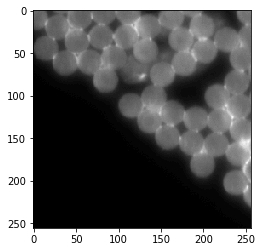

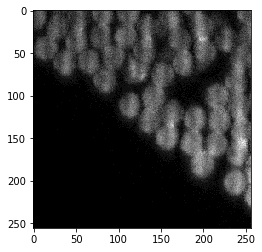

In [5]:
#import glob

#mat_fname_test = glob.glob(datadir + 'phantom3d_3_3_sub12.mat')
#data_dir = pjoin('E', 'joy', 'thumb')
#data_dir='E:\joy\thumb'

datadir='/home/hzhuge/Documents/phantom_stack/phantom_slide_stack/'
mat_fname_test = pjoin(datadir,'phantom3d_2_sub4.mat')
file=sio.loadmat(mat_fname_test)
#mat_contents = mat73.loadmat(mat_fname_test)
image = file['newI']
w = image.shape[1]

w = w // 2
      
real_data = image[:, :w,:]
input_data = image[:, w:,:]

inp=input_data[:,:,10]
plt.figure()
plt.imshow(inp,cmap='gray')

re=real_data[:,:,10]
plt.figure()
plt.imshow(re,cmap='gray')

input_data_string=input_data.tostring()
recons=np.fromstring(input_data_string,dtype=np.uint8)
inp=tf.cast(recons,tf.float32)
recons_data=recons.reshape(input_data.shape)
np.allclose(input_data,recons_data)
re=recons_data[:,:,10]

# inp, re = load(mat_fname_test)
# inp_mid=inp[:,:,10]
# re_mid=inp[:,:,10]
# plt.figure()
# plt.imshow(inp_mid,cmap='gray')
# plt.figure()
# plt.imshow(re_mid,cmap='gray')

inp=input_data

In [6]:
np.allclose(input_data,recons_data)

True

## Input Pipeline

In [8]:
tfrecords_filename = 'phantom_slide_temp.tfrecords'
train_dataset=tf.data.TFRecordDataset(tfrecords_filename)
train_dataset=train_dataset.map(read_and_decode)
train_dataset=train_dataset.shuffle(BUFFER_SIZE)
train_dataset=train_dataset.batch(BATCH_SIZE)

In [9]:
tfrecords_filename_test = 'phantom_slide_temp.tfrecords'
test_dataset = tf.data.TFRecordDataset(tfrecords_filename_test)
test_dataset = test_dataset.map(read_and_decode)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [29]:
tfrecords_filename_test = 'pollen_slide_test.tfrecords'
test_dataset_pollen = tf.data.TFRecordDataset(tfrecords_filename_test)
test_dataset_pollen  = test_dataset_pollen.map(read_and_decode)
test_dataset_pollen =test_dataset_pollen.batch(BATCH_SIZE)

In [30]:
tfrecords_filename_test = 'pollen_slide_resize_test.tfrecords'
test_dataset_pollen_resize = tf.data.TFRecordDataset(tfrecords_filename_test)
test_dataset_pollen_resize  = test_dataset_pollen_resize.map(read_and_decode)
test_dataset_pollen_resize =test_dataset_pollen_resize.batch(BATCH_SIZE)

In [26]:
tfrecords_filename_test = 'prostate_slide_resize_test.tfrecords'
test_dataset_prostate_resize = tf.data.TFRecordDataset(tfrecords_filename_test)
test_dataset_prostate_resize  = test_dataset_prostate_resize.map(read_and_decode)
test_dataset_prostate_resize =test_dataset_prostate_resize.batch(BATCH_SIZE)

## Build the Generator
  * The architecture of generator is a modified U-Net.
  * Each block in the encoder is (Conv -> Batchnorm -> Leaky ReLU)
  * Each block in the decoder is (Transposed Conv -> Batchnorm -> Dropout(applied to the first 3 blocks) -> ReLU)
  * There are skip connections between the encoder and decoder (as in U-Net).



In [11]:
OUTPUT_CHANNELS =21

In [12]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [23]:

down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
#down_result=down_model(inp)
print (down_result.shape)

ValueError: Incompatible type conversion requested to type 'uint8' for variable of type 'float32'

In [13]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
#     tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
#                                     padding='same',
#                                     kernel_initializer=initializer,
#                                     use_bias=False))
      tf.keras.layers.UpSampling2D(size=(2,2), interpolation='nearest') )

  result.add(
      tf.keras.layers.Conv2D(filters, size,
                             padding='same',
                             kernel_initializer=initializer,
                             use_bias=False))
    
  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [13]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

NameError: name 'down_result' is not defined

In [14]:
def Generator():
    
  inputs = tf.keras.layers.Input(shape=[256,256,21])
 
    
  down_stack = [
    downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64)
    downsample(128, 4), # (bs, 64, 64, 128)
    downsample(256, 4), # (bs, 32, 32, 256)
    downsample(512, 4), # (bs, 16, 16, 512)
    downsample(512, 4), # (bs, 8, 8, 512)
    downsample(512, 4), # (bs, 4, 4, 512)
    downsample(512, 4), # (bs, 2, 2, 512)
    downsample(512, 4), # (bs, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
    upsample(512, 4), # (bs, 16, 16, 1024)
    upsample(256, 4), # (bs, 32, 32, 512)
    upsample(128, 4), # (bs, 64, 64, 256)
    upsample(64, 4), # (bs, 128, 128, 128)
  ]


  initializer = tf.random_normal_initializer(0., 0.02)

  init=tf.keras.layers.UpSampling2D(size=(2,2),interpolation='nearest')
  last=tf.keras.layers.Conv2D(OUTPUT_CHANNELS,4,padding='same',kernel_initializer=initializer,activation='tanh')  
    
#   last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
#                                          strides=2,
#                                          padding='same',
#                                          kernel_initializer=initializer,
#                                          activation='tanh') # (bs, 256, 256, 20)

  #concat = tf.keras.layers.Concatenate()

  
  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])
  x = init(x)
  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [15]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

#tf.keras.utils.plot_model(generator, show_shapes=True)
#gen_output = generator(inp[tf.newaxis,...], training=False)

#plt.imshow(gen_output[0,:,:,11],cmap='gray')
#plt.imshow(gen_output[0,...])

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Build the Discriminator
  * The Discriminator is a PatchGAN.
  * Each block in the discriminator is (Conv -> BatchNorm -> Leaky ReLU)
  * The shape of the output after the last layer is (batch_size, 30, 30, 1)
  * Each 30x30 patch of the output classifies a 70x70 portion of the input image (such an architecture is called a PatchGAN).
  * Discriminator receives 2 inputs.
    * Input image and the target image, which it should classify as real.
    * Input image and the generated image (output of generator), which it should classify as fake.
    * We concatenate these 2 inputs together in the code (`tf.concat([inp, tar], axis=-1)`)

In [16]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 21], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 21], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, 16,channels*2)
  

  down1 = downsample(64, 4, False)(x) # (bs, 128, 128,8, 64)
  down2 = downsample(128, 4)(down1) # (bs, 64, 64,4, 128)
  down3 = downsample(256, 4)(down2) # (bs, 32, 32, 2,256)
  #down4 = downsample(512, 4)(down3) # (bs, 16, 16, 2,512)
  

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34,4, 512)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31,1, 1024)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33,3, 1024)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [17]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True)
#disc_out = discriminator([inp[tf.newaxis,...], gen_output], training=False)


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


To learn more about the architecture and the hyperparameters you can refer the [paper](https://arxiv.org/abs/1611.07004).

## Define the loss functions and the optimizer

* **Discriminator loss**
  * The discriminator loss function takes 2 inputs; **real images, generated images**
  * real_loss is a sigmoid cross entropy loss of the **real images** and an **array of ones(since these are the real images)**
  * generated_loss is a sigmoid cross entropy loss of the **generated images** and an **array of zeros(since these are the fake images)**
  * Then the total_loss is the sum of real_loss and the generated_loss

* **Generator loss**
  * It is a sigmoid cross entropy loss of the generated images and an **array of ones**.
  * The [paper](https://arxiv.org/abs/1611.07004) also includes L1 loss which is MAE (mean absolute error) between the generated image and the target image.
  * This allows the generated image to become structurally similar to the target image.
  * The formula to calculate the total generator loss = gan_loss + LAMBDA * l1_loss, where LAMBDA = 100. This value was decided by the authors of the [paper](https://arxiv.org/abs/1611.07004).

In [18]:
LAMBDA = 100

In [19]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [20]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [21]:

def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [22]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.1)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.1)

## Checkpoints (Object-based saving)

In [23]:
#checkpoint_path = 'E:\joy\checkpoint_thumb'
checkpoint_path = '/home/hzhuge/Documents/phantom_stack/training_checkpoints_new4/'
ckpt = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path,max_to_keep=2000)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


## Training

* We start by iterating over the dataset
* The generator gets the input image and we get a generated output.
* The discriminator receives the input_image and the generated image as the first input. The second input is the input_image and the target_image.
* Next, we calculate the generator and the discriminator loss.
* Then, we calculate the gradients of loss with respect to both the generator and the discriminator variables(inputs) and apply those to the optimizer.
* This entire procedure is shown in the images below.

![Discriminator Update Image](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/dis.png?raw=1)


---


![Generator Update Image](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gen.png?raw=1)

## Generate Images

* After training, its time to generate some images!
* We pass images from the test dataset to the generator.
* The generator will then translate the input image into the output we expect.
* Last step is to plot the predictions and **voila!**

In [21]:
def generate_images(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

#   import random 
#   import os 
  
 
#   directory = r'E:/joy/test'
#   os.chdir(directory)
#   r1 = random.randint(0, 200) 

 
#   wide=test_input[0]
#   wide=wide[:,:,0]* 0.5 + 0.5
#   filename1="% d _input.png" %(r1) 
#   plt.imsave(filename1, wide,cmap="viridis")

#   target=tar[0]
#   target=target[:,:,0]* 0.5 + 0.5
#   filename2="% d _target.png" %(r1) 
#   plt.imsave(filename2, target,cmap="viridis")

#   pred=prediction[0]
#   pred=pred[:,:,0]* 0.5 + 0.5
#   filename3="% d _prediction.png" %(r1) 
#   plt.imsave(filename3, pred,cmap="viridis")
  input=display_list[0]
  ground=display_list[1]
  predict=display_list[2]
  inputim_l=np.array(input[:,:,10]*0.5+0.5)
  ground_l=np.array(ground[:,:,10]*0.5+0.5)
  predict_l=np.array(predict[:,:,10]*0.5+0.5)
  
  inputim_g= input[:,:,10]*0.5+0.5
  ground_g = ground[:,:,10]*0.5+0.5
  predict_g = predict[:,:,10]*0.5+0.5
  
  mgi=np.square(np.subtract(ground_l, inputim_l)).mean()
  sgi=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(inputim_g,2), max_val=1.0).numpy()

     
  mgp=np.square(np.subtract(ground_l, predict_l)).mean()
  sgp=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
       
  mip=np.square(np.subtract(inputim_l, predict_l)).mean()
  sip=tf.image.ssim(tf.expand_dims(inputim_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
  
#  df = pd.DataFrame(np.array([mgi,mgp,mip,sgi,sgp,sip]), columns =['mse_ground_input','mse_ground_predict','mse_input_predict','ssim_ground_input',
#           'ssim_ground_predict','ssim_input_predict']) 
  d={'mse_ground_input':mgi,'mse_ground_predict':mgp,'mse_input_predict':mip,'ssim_ground_input':sgi,
           'ssim_ground_predict':sgp,'ssim_input_predict':sip}
  ps=pd.Series(d)

 
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    im=display_list[i]
    img=im[:,:,10] * 0.5 + 0.5
    plt.imshow(img,cmap='gray')
    print(np.mean(img))
    plt.axis('off')
  plt.show()
  print(ps)

0.08180398
0.023215078
0.038076777


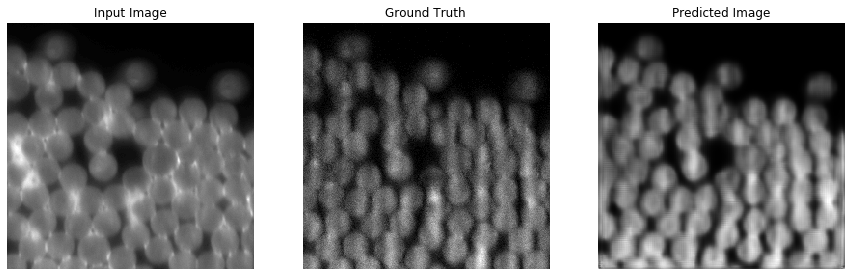

mse_ground_input       0.004711
mse_ground_predict     0.000433
mse_input_predict      0.002863
ssim_ground_input      0.529440
ssim_ground_predict    0.884268
ssim_input_predict     0.668934
dtype: float64


In [36]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

### training

In [37]:
EPOCHS = 1000
import datetime
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


In [38]:
@tf.function
def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)


In [39]:
def fit(train_ds, epochs, test_ds):
   for epoch in range(1,1000):
     ckpt.restore(ckpt_manager.latest_checkpoint)
   
     if ckpt_manager.latest_checkpoint:
           print("Restored from {}".format(ckpt_manager.latest_checkpoint))
     else:
           print("Initializing from scratch.")
            
     start = time.time()
     display.clear_output(wait=True) 
    
     for example_input, example_target in test_ds.take(1):
        generate_images(generator, example_input, example_target)
     print("Epoch: ", epoch)

    # Train
     for n, (input_image, target) in train_ds.enumerate():
       print('.', end='')
       if (n+1) % 100 == 0:
         print()
       train_step(input_image, target, epoch)
     print()

     print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))

        # saving (checkpoint) the model every 50 epochs
     if (epoch + 1) % 100 == 0:
         ckpt_save_path = ckpt_manager.save()
         print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))


0.08180398
0.023215078
0.023065386


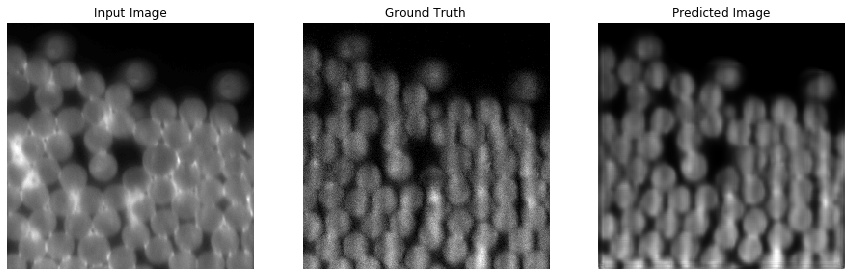

mse_ground_input       0.004711
mse_ground_predict     0.000022
mse_input_predict      0.004728
ssim_ground_input      0.529440
ssim_ground_predict    0.980620
ssim_input_predict     0.527115
dtype: float64
Epoch:  311
.............

KeyboardInterrupt: 

In [40]:
fit(train_dataset,EPOCHS,test_dataset)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

## Restore the latest checkpoint and test

In [23]:
!ls {checkpoint_path}
checkpoint_path

checkpoint		    ckpt-2.data-00001-of-00002
ckpt-1.data-00000-of-00002  ckpt-2.index
ckpt-1.data-00001-of-00002  ckpt-3.data-00000-of-00002
ckpt-1.index		    ckpt-3.data-00001-of-00002
ckpt-2.data-00000-of-00002  ckpt-3.index


'/home/hzhuge/Documents/phantom_stack/training_checkpoints_new4/'

In [24]:
# restoring the latest checkpoint in checkpoint_dir
#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
ckpt.restore(ckpt_manager.latest_checkpoint)


## Generate using test dataset

0.08180398
0.023215078
0.02293161


mse_ground_input       0.004711
mse_ground_predict     0.000021
mse_input_predict      0.004746
ssim_ground_input      0.529440
ssim_ground_predict    0.980867
ssim_input_predict     0.525245
dtype: float64
0.058871634
0.014430445
0.015285276


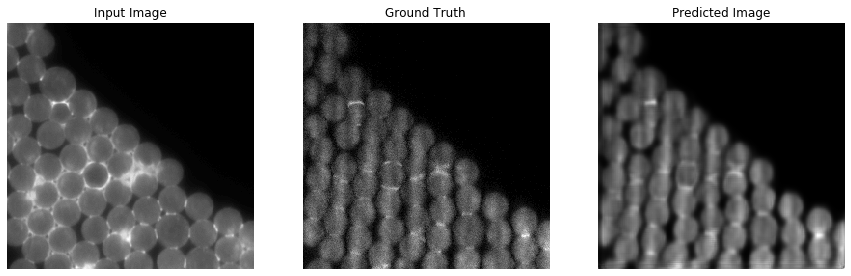

mse_ground_input       0.003420
mse_ground_predict     0.000016
mse_input_predict      0.003297
ssim_ground_input      0.582457
ssim_ground_predict    0.985311
ssim_input_predict     0.594645
dtype: float64
0.035627
0.011270021
0.010278916


mse_ground_input       0.001364
mse_ground_predict     0.000015
mse_input_predict      0.001470
ssim_ground_input      0.696982
ssim_ground_predict    0.989163
ssim_input_predict     0.681298
dtype: float64
0.046325684
0.009544821
0.009219672


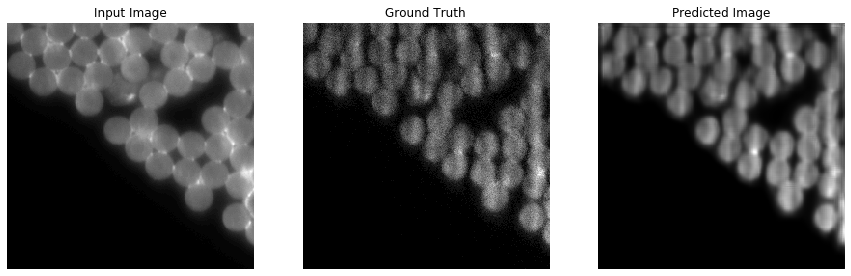

mse_ground_input       0.002458
mse_ground_predict     0.000009
mse_input_predict      0.002488
ssim_ground_input      0.580052
ssim_ground_predict    0.989124
ssim_input_predict     0.569722
dtype: float64
0.077690035
0.020381073
0.020652497


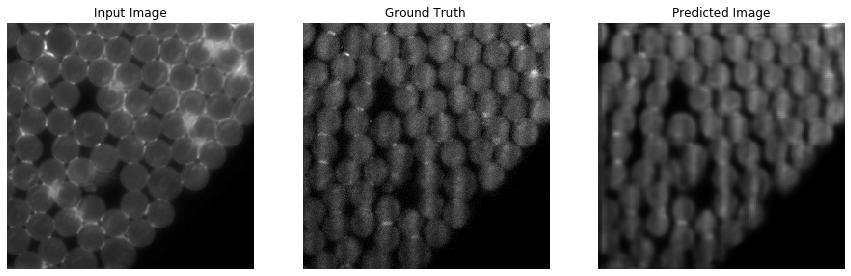

mse_ground_input       0.004442
mse_ground_predict     0.000020
mse_input_predict      0.004399
ssim_ground_input      0.494088
ssim_ground_predict    0.980803
ssim_input_predict     0.502276
dtype: float64
0.0827575
0.039467365
0.038259156


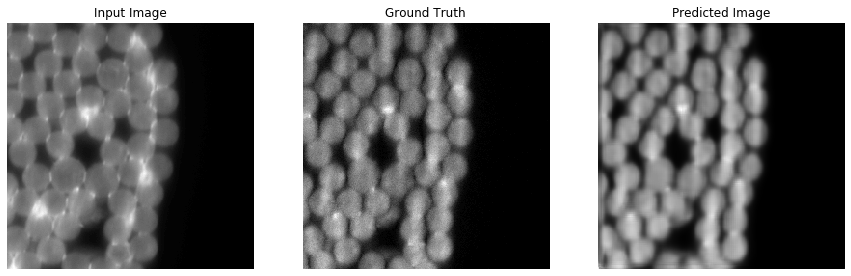

mse_ground_input       0.003224
mse_ground_predict     0.000036
mse_input_predict      0.003395
ssim_ground_input      0.718725
ssim_ground_predict    0.980215
ssim_input_predict     0.705185
dtype: float64
0.064186245
0.014801803
0.014575554


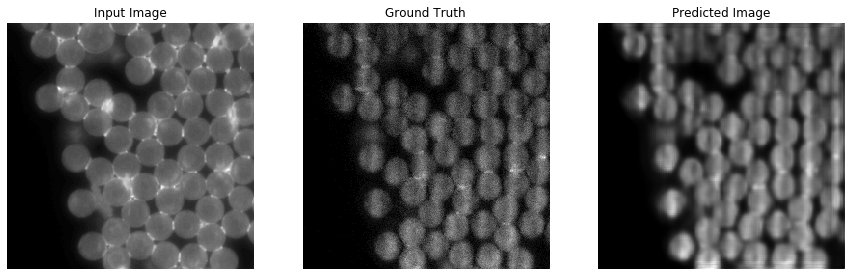

mse_ground_input       0.003307
mse_ground_predict     0.000014
mse_input_predict      0.003335
ssim_ground_input      0.486386
ssim_ground_predict    0.983089
ssim_input_predict     0.485402
dtype: float64
0.06648918
0.033366896
0.030965757


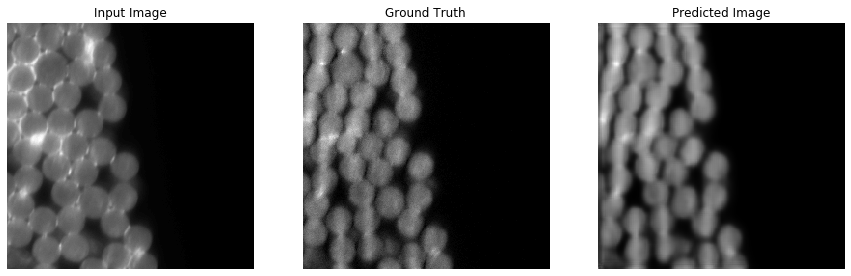

mse_ground_input       0.002500
mse_ground_predict     0.000041
mse_input_predict      0.002801
ssim_ground_input      0.745658
ssim_ground_predict    0.980824
ssim_input_predict     0.726060
dtype: float64
0.06837409
0.027107388
0.028595211


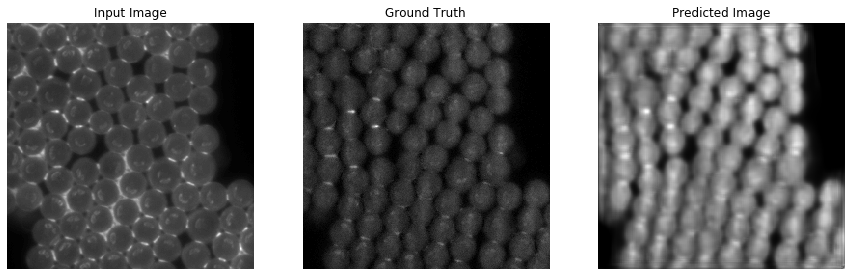

mse_ground_input       0.002269
mse_ground_predict     0.000032
mse_input_predict      0.002117
ssim_ground_input      0.633457
ssim_ground_predict    0.973534
ssim_input_predict     0.655507
dtype: float64
0.020548023
0.0049284096
0.004293915


mse_ground_input       0.000637
mse_ground_predict     0.000007
mse_input_predict      0.000691
ssim_ground_input      0.743961
ssim_ground_predict    0.991229
ssim_input_predict     0.729397
dtype: float64


In [43]:
for example_input, example_target in test_dataset.take(10):
  generate_images(generator, example_input, example_target)

## verify optical sectioning

In [26]:
def generate_images_stack(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
  fig,ax = plt.subplots(21, 3, figsize=(15,15),dpi=100)
  w,h=21,3;
  matrix_mean=[[0 for x in range(w)] for y in range(h)]

  for j in range(0,21):
     for i in range(3):
        im=display_list[i]
        img=im[:,:,j] * 0.5 + 0.5
        k=j
        ax[k,i].imshow(img,cmap='gray')
        ax[k,i].set_title(title[i]+'  d='+str(j+1))
        ax[k,i].axis('off')
        ax[k,i].autoscale(enable=True) 
        
        directory = r'/home/hzhuge/Documents/phantom_stack/test_21channel/'
        filename='t5_'+title[i]+'_d='+str(j+1)+'.png' 
        matrix_mean[i][j]=np.mean(img)
    
        plt.imsave(os.path.join(directory,filename), img,cmap='gray')
  plt.tight_layout(pad=0.4, w_pad=0.001, h_pad=0.2)
  plt.show()
  return matrix_mean

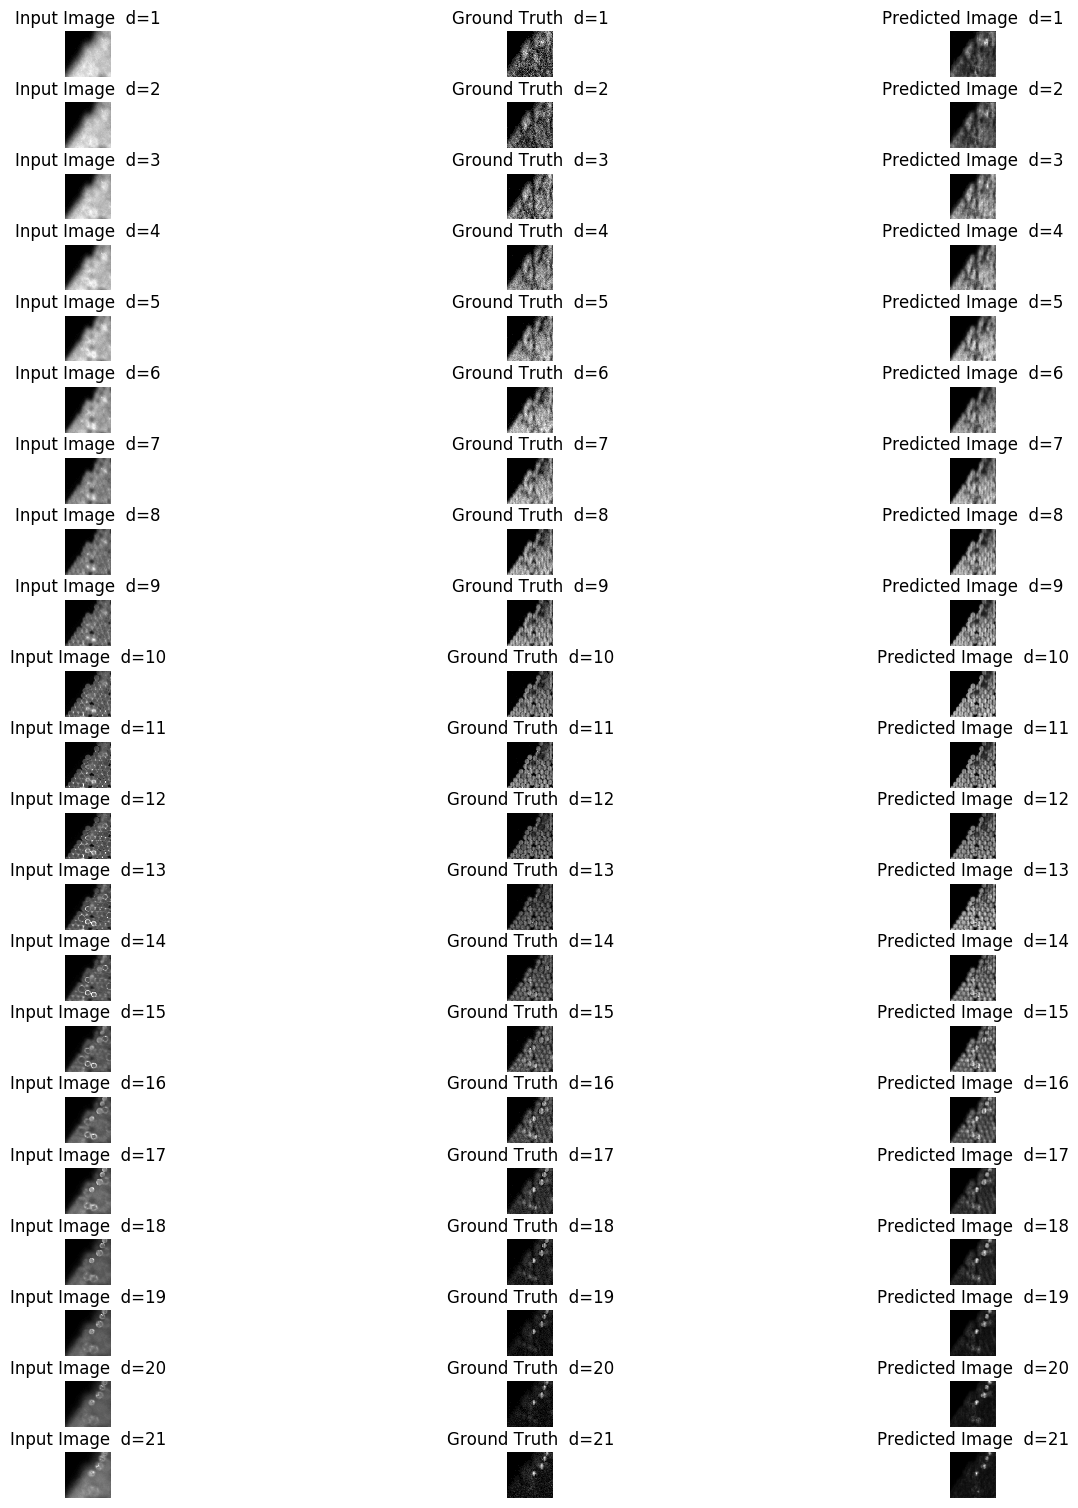

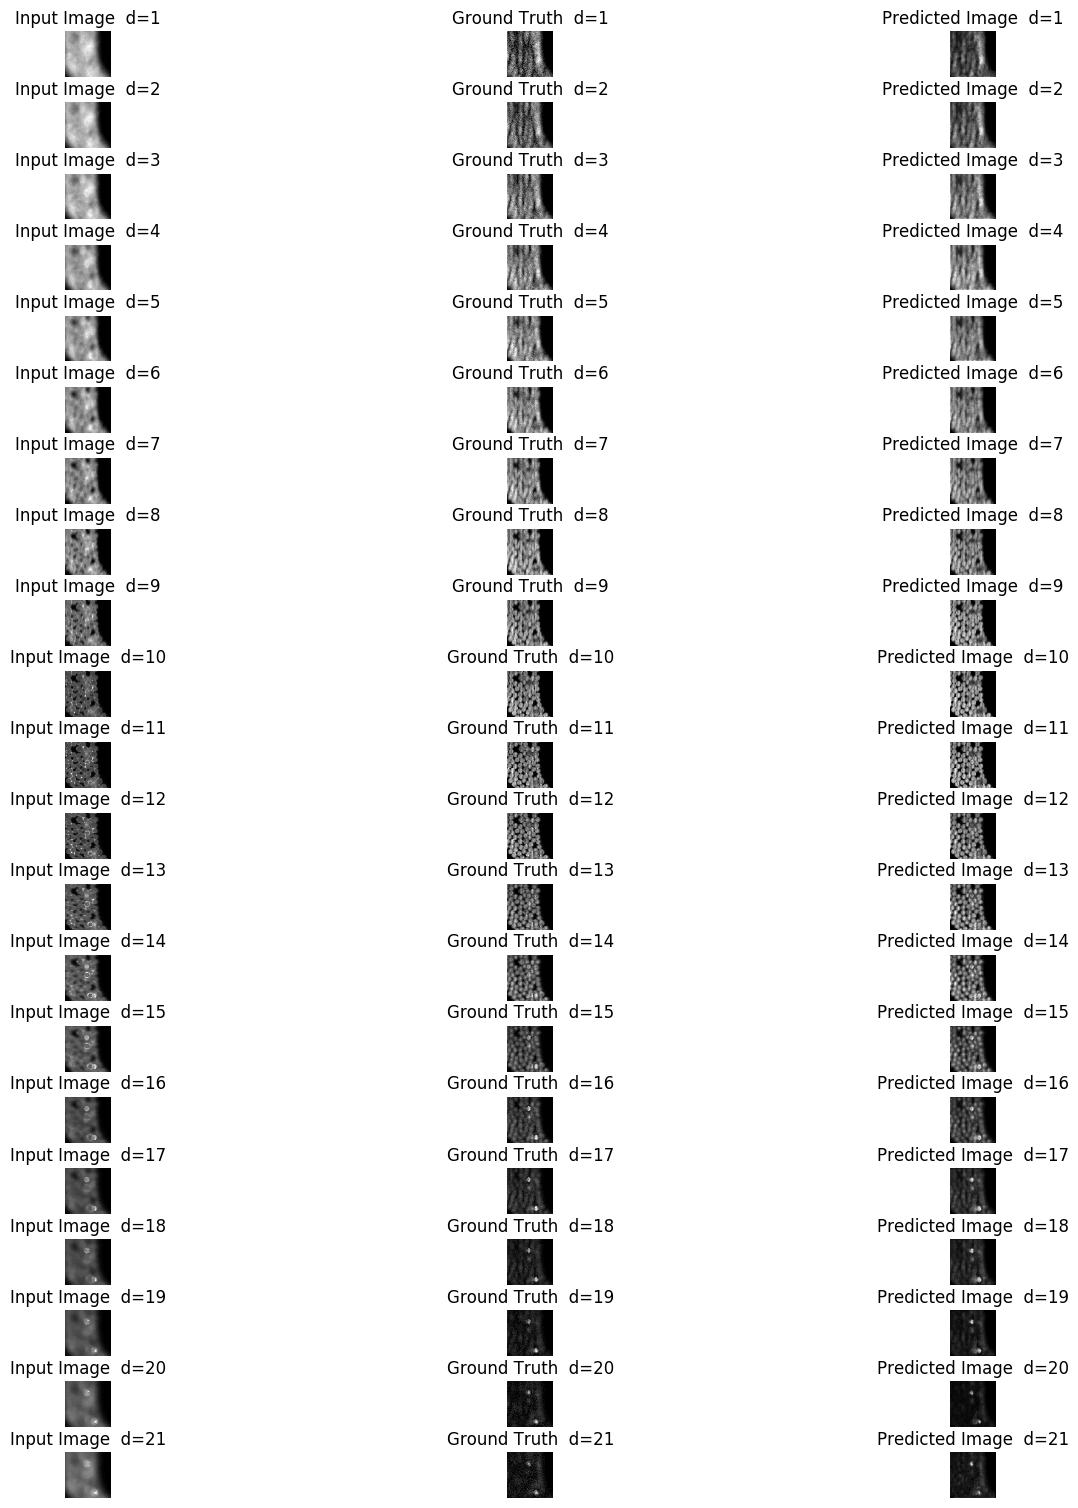

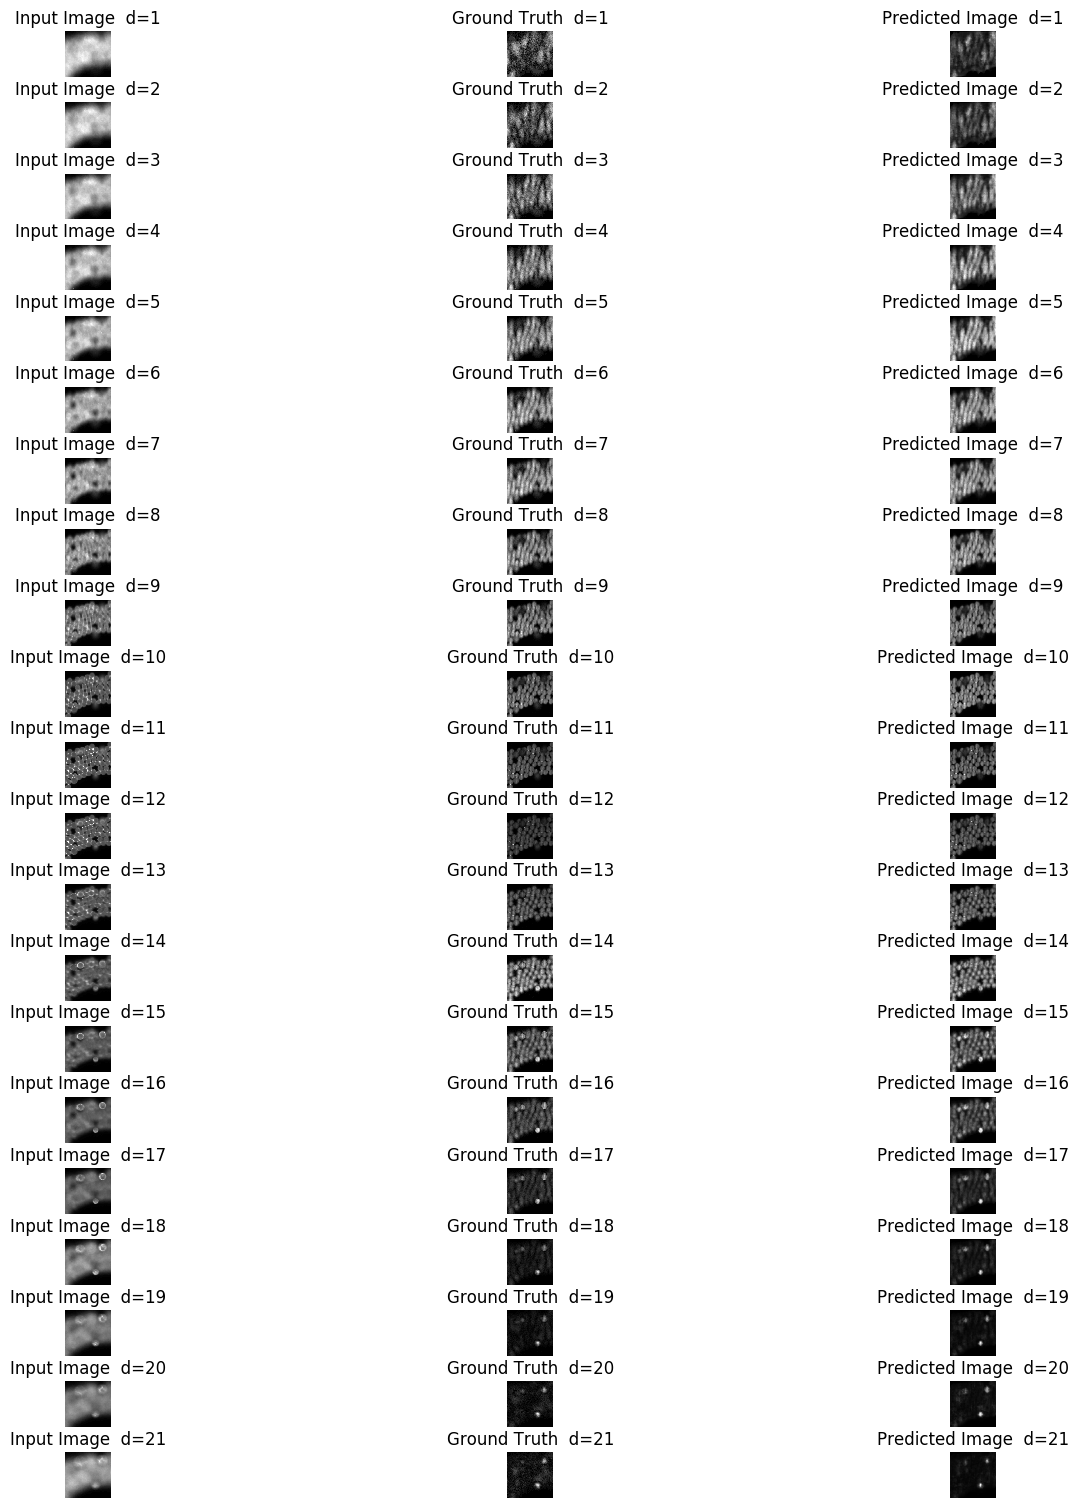

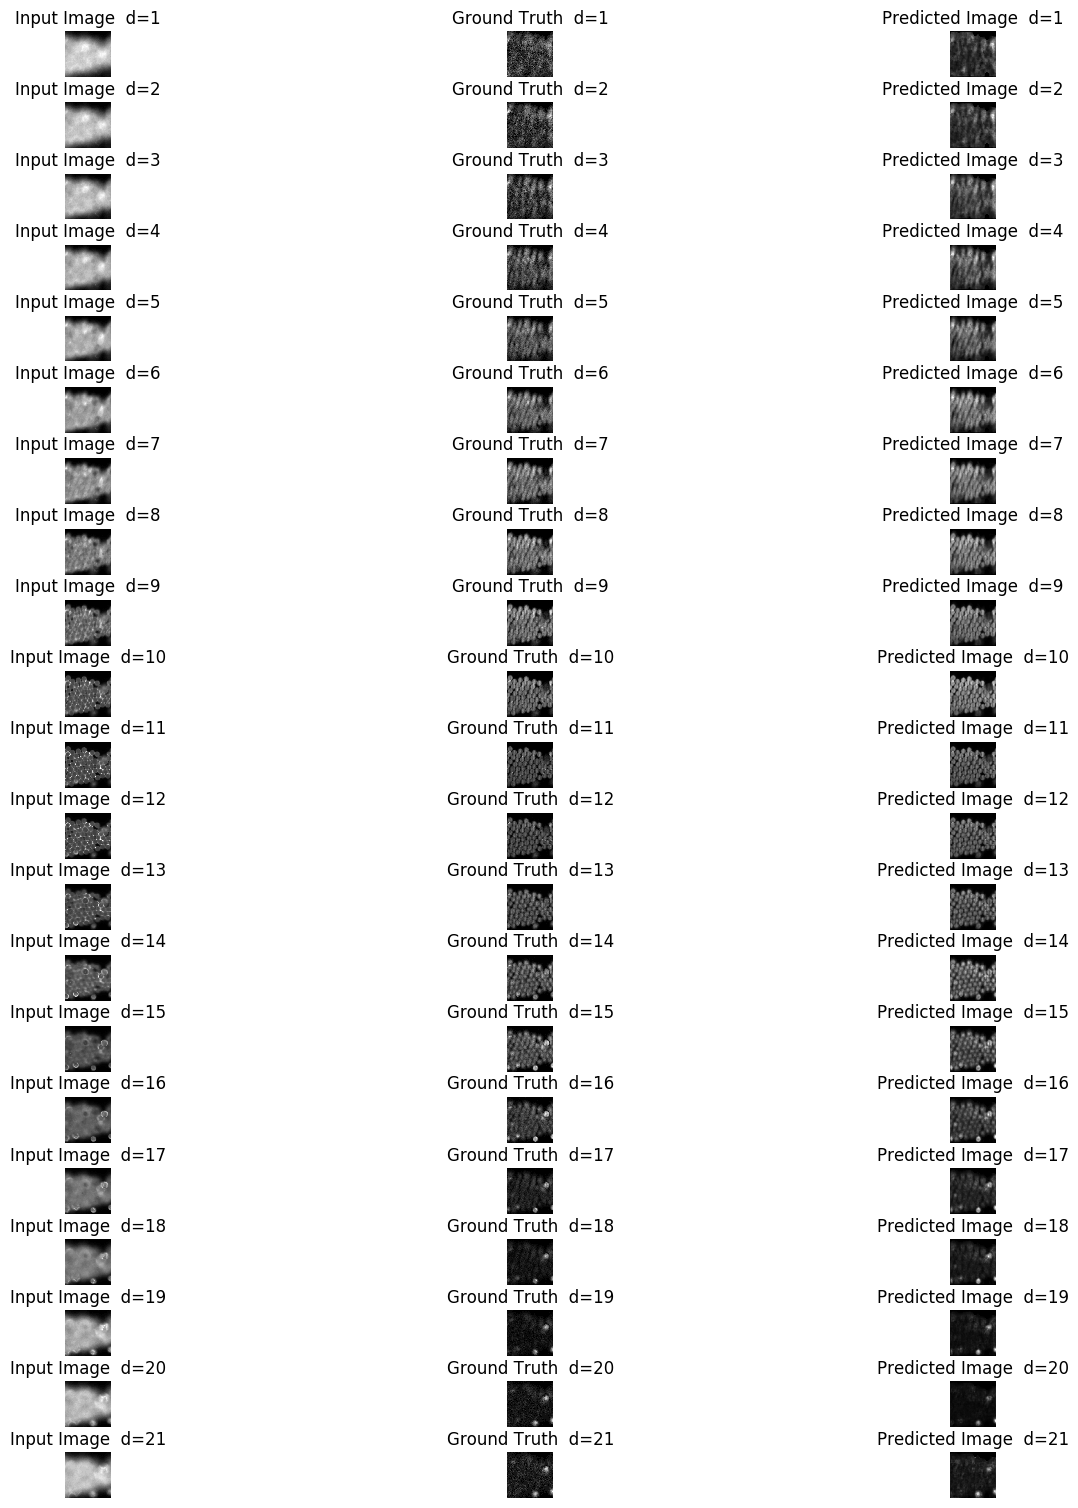

In [27]:
for example_input, example_target in test_dataset.take(5):
  matrix_mean=generate_images_stack(generator, example_input, example_target)

In [24]:
def generate_images_stack(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
  fig,ax = plt.subplots(21, 3, figsize=(15,15),dpi=100)
  w,h=21,3;
  matrix_mean=[[0 for x in range(w)] for y in range(h)]

  for j in range(0,21):
     for i in range(3):
        im=display_list[i]
        img=im[:,:,j] * 0.5 + 0.5
        k=j
        ax[k,i].imshow(img,cmap='gray')
        ax[k,i].set_title(title[i]+'  d='+str(j+1))
        ax[k,i].axis('off')
        ax[k,i].autoscale(enable=True) 
        
        directory = r'/home/hzhuge/Documents/phantom_stack/test_21channel_new/'
        filename='t2'+title[i]+'_d='+str(j+1)+'.png' 
        matrix_mean[i][j]=np.mean(img)
    
        #plt.imsave(os.path.join(directory,filename), img,cmap='gray')
  plt.tight_layout(pad=0.4, w_pad=0.001, h_pad=0.2)
  plt.show()
  return matrix_mean

     

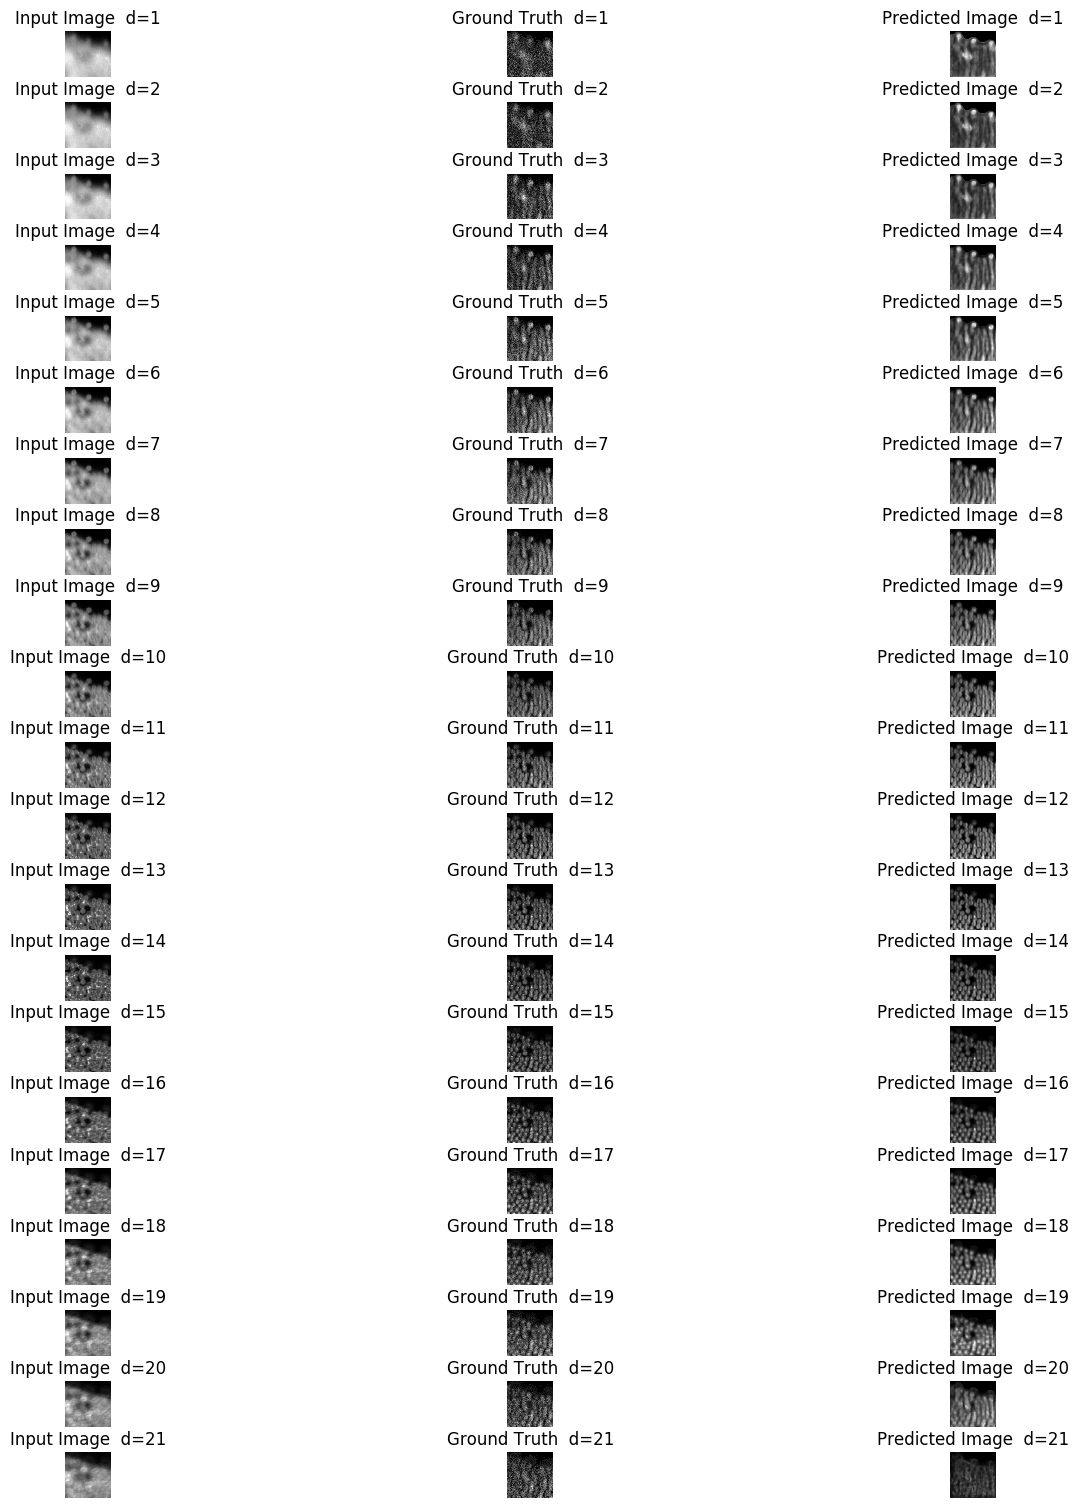

In [25]:
for example_input, example_target in test_dataset.take(1):
  matrix_mean=generate_images_stack(generator, example_input, example_target)

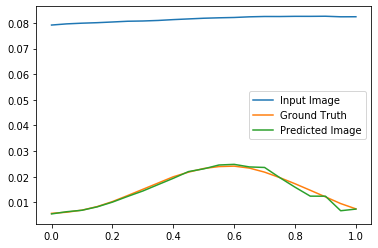

In [26]:
matrix_mean
x = np.linspace(0, 1, 21)
plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[2])
plt.legend(['Input Image', 'Ground Truth', 'Predicted Image'])

## compute ssim and mse

In [47]:
def generate_images_measure_mean(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]

  w,h=21,3;
  matrix_mean=[[0 for x in range(w)] for y in range(h)]

  for j in range(0,21):
     for i in range(3):
        im=display_list[i]
        img=im[:,:,j] * 0.5 + 0.5
        matrix_mean[i][j]=np.mean(img)
  
 
  return matrix_mean


In [48]:
array_mean = []
i=0
for example_input, example_target in test_dataset.take(10):
  matrix_mean=generate_images_measure_mean(generator, example_input, example_target) 
  array_mean.append(matrix_mean)
  i=i+1


In [49]:
end=np.mean(array_mean,axis=(0))

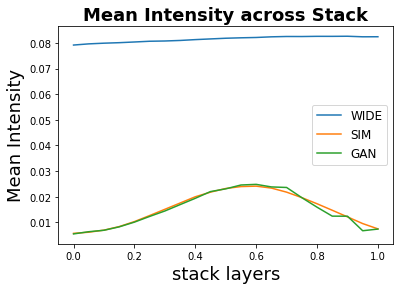

In [32]:


plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[2])
plt.legend(['WIDE', 'SIM', 'GAN'],fontsize=12)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Intensity',fontsize=18)
plt.title('Mean Intensity across Stack',fontsize=18,fontweight='bold')
plt.savefig('mean intensity1.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
def generate_images_ssim(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
  inputim_l=display_list[0]
  ground_l=display_list[1]
  predict_l=display_list[2]
  
  mse_ground_input=[]
  mse_ground_predict=[]
  mse_input_predict=[]
  ssim_ground_input=[]
  ssim_ground_predict=[]
  ssim_input_predict=[]
 
  for j in range(0,21):
        
        ground_g=ground_l[:,:,j]*0.5+0.5
       
        #ground_g = cv2.cvtColor(ground,cv2.COLOR_BGR2GRAY)
        inputim_g=inputim_l[:,:,j]*0.5+0.5
 
        #inputim_g= cv2.cvtColor(inputim,cv2.COLOR_BGR2GRAY)
        predict_g=predict_l[:,:,j]*0.5+0.5

        #predict_g = cv2.cvtColor(predict,cv2.COLOR_BGR2GRAY)
        
        #mgi=mse(ground_g,inputim_g)
        mgi=np.square(np.subtract(ground_g, inputim_g)).mean()
        #mgi=tf.keras.losses.MSE(ground_g, inputim_g).numpy()
        mse_ground_input.append(mgi)
        
        #sgi=measure.compare_ssim(ground_g,inputim_g)
        sgi=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(inputim_g,2), max_val=1.0).numpy()
        ssim_ground_input.append(sgi)
        
        #mgp=mse(ground_g,predict_g)
        mgp=np.square(np.subtract(ground_g, predict_g)).mean()
        #mgp=tf.keras.losses.MSE(ground_g, predict_g).numpy()
        mse_ground_predict.append(mgp)
        
        #sgp=measure.compare_ssim(ground_g,predict_g)
        sgp=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
        ssim_ground_predict.append(sgp)
        
        #mip=mse(inputim_g,predict_g)
        mip=np.square(np.subtract(inputim_g, predict_g)).mean()
        #mip=tf.keras.losses.MSE(inputim_g,predict_g).numpy()
        mse_input_predict.append(mip)
        
        #sip=measure.compare_ssim(inputim_g,predict_g)
        sip=tf.image.ssim(tf.expand_dims(inputim_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
        ssim_input_predict.append(sip)
    
  df = pd.DataFrame(list(zip(mse_ground_input,mse_ground_predict,mse_input_predict,ssim_ground_input,
         ssim_ground_predict,ssim_input_predict)), columns =['mse_ground_input','mse_ground_predict','mse_input_predict','ssim_ground_input',
           'ssim_ground_predict','ssim_input_predict']) 

  
  return df

     

In [34]:
for example_input, example_target in test_dataset.take(1):
  df=generate_images_ssim(generator, example_input, example_target)

ave=df.mean(axis = 0)
ave

mse_ground_input       0.005790
mse_ground_predict     0.000020
mse_input_predict      0.005810
ssim_ground_input      0.402224
ssim_ground_predict    0.973695
ssim_input_predict     0.393867
dtype: float64

In [35]:
x = range(21)
plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[2])
plt.legend(['WIDE', 'SIM', 'GAN'],fontsize=12)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Intensity',fontsize=18)
plt.title('Mean Intensity across Stack',fontsize=18,fontweight='bold')
plt.savefig('mean intensity1.png', dpi=300, bbox_inches='tight')
plt.show()

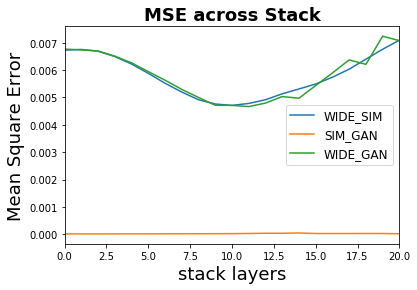

In [63]:
df.plot(y=['mse_ground_input','mse_ground_predict','mse_input_predict'])
plt.legend(['WIDE_SIM', 'SIM_GAN','WIDE_GAN'],fontsize=12)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Square Error',fontsize=18)
plt.title('MSE across Stack',fontsize=18,fontweight='bold')
plt.savefig('MSE1.png', dpi=300, bbox_inches='tight')
plt.show()

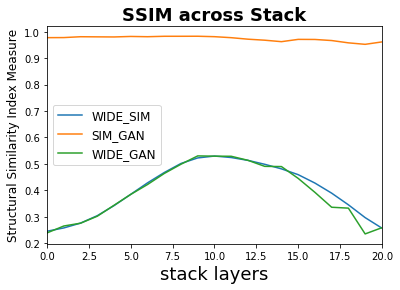

In [64]:
df.plot(y=['ssim_ground_input','ssim_ground_predict','ssim_input_predict'])
plt.legend(['WIDE_SIM', 'SIM_GAN','WIDE_GAN'],fontsize=12)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Structural Similarity Index Measure',fontsize=12)
plt.title('SSIM across Stack',fontsize=18,fontweight='bold')
plt.savefig('SSIM1.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
def generate_images(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    im=display_list[i]
    img=im[:,:,10] * 0.5 + 0.5
    plt.imshow(img,cmap='gray')
    print(np.max(img))
    print(np.min(img))
    plt.axis('off')
  plt.show()

In [43]:
for example_input, example_target in train_dataset.take(1):
  generate_images(generator, example_input, example_target)

0.25882354
0.0039215684
0.09803921
0.0
0.0877873
0.0


In [ ]:
def generate_images_stack(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
  #fig,ax = plt.subplots(21, 3, figsize=(15,15),dpi=100)
  #w,h=21,3;
 

  for j in range(0,21):
     for i in range(3):
        im=display_list[i]
        img=im[:,:,j] * 0.5 + 0.5
        k=j
        ax[k,i].imshow(img,cmap='gray')
        ax[k,i].set_title(title[i]+'  d='+str(j+1))
        ax[k,i].axis('off')
        ax[k,i].autoscale(enable=True) 
        
        directory = r'/home/hzhuge/Documents/phantom_stack/training_checkpoints_phantom21/test_21channel/'
        filename='t11_'+title[i]+'_d='+str(j+1)+'.png' 
    
    
        plt.imsave(os.path.join(directory,filename), img,cmap='gray')
  plt.tight_layout(pad=0.4, w_pad=0.001, h_pad=0.2)
  plt.show()



In [43]:
def mutual_information(hgram):
...     """ Mutual information for joint histogram
...     """
...     # Convert bins counts to probability values
...     pxy = hgram / float(np.sum(hgram))
...     px = np.sum(pxy, axis=1) # marginal for x over y
...     py = np.sum(pxy, axis=0) # marginal for y over x
...     px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
...     # Now we can do the calculation using the pxy, px_py 2D arrays
...     nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
...     return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

In [85]:
def generate_images_mi(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
  inputim_l=display_list[0]
  ground_l=display_list[1]
  predict_l=display_list[2]
  
  s_mi_gi=[]
  s_mi_gp=[]
  s_mi_ip=[]
 
  for j in range(0,21):
        
        ground_g=ground_l[:,:,j]*0.5+0.5
       
        #ground_g = cv2.cvtColor(ground,cv2.COLOR_BGR2GRAY)
        inputim_g=inputim_l[:,:,j]*0.5+0.5
 
        #inputim_g= cv2.cvtColor(inputim,cv2.COLOR_BGR2GRAY)
        predict_g=predict_l[:,:,j]*0.5+0.5

        #predict_g = cv2.cvtColor(predict,cv2.COLOR_BGR2GRAY)
        
        #mgi=mse(ground_g,inputim_g)
        #mgi=np.square(np.subtract(ground_g, inputim_g)).mean()
        #mgi=tf.keras.losses.MSE(ground_g, inputim_g).numpy()
        #mse_ground_input.append(mgi)
        hist_2d_gi, x_edges, y_edges = np.histogram2d(inputim_g.numpy().ravel(),ground_g.numpy().ravel(),bins=20)
        mi_gi=mutual_information(hist_2d_gi)
        s_mi_gi.append(mi_gi)
        #sgi=measure.compare_ssim(ground_g,inputim_g)
#         sgi=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(inputim_g,2), max_val=1.0).numpy()
#         ssim_ground_input.append(sgi)
        
#         #mgp=mse(ground_g,predict_g)
#         mgp=np.square(np.subtract(ground_g, predict_g)).mean()
#         #mgp=tf.keras.losses.MSE(ground_g, predict_g).numpy()
#         mse_ground_predict.append(mgp)
        hist_2d_gp, x_edges, y_edges = np.histogram2d(predict_g.numpy().ravel(),ground_g.numpy().ravel(),bins=20)
        mi_gp=mutual_information(hist_2d_gp)
        s_mi_gp.append(mi_gp)
        #sgp=measure.compare_ssim(ground_g,predict_g)
#         sgp=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
#         ssim_ground_predict.append(sgp)
        
        #mip=mse(inputim_g,predict_g)
#         mip=np.square(np.subtract(inputim_g, predict_g)).mean()
#         #mip=tf.keras.losses.MSE(inputim_g,predict_g).numpy()
#         mse_input_predict.append(mip)
        hist_2d_ip, x_edges, y_edges = np.histogram2d(predict_g.numpy().ravel(),inputim_g.numpy().ravel(),bins=20)
        mi_ip=mutual_information(hist_2d_ip)
        s_mi_ip.append(mi_ip)
#         #sip=measure.compare_ssim(inputim_g,predict_g)
#         sip=tf.image.ssim(tf.expand_dims(inputim_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
#         ssim_input_predict.append(sip)
    
  df = pd.DataFrame(list(zip(s_mi_gi,s_mi_gp,s_mi_ip)), 
                    columns =['mi_ground_input','mi_ground_predict','mi_input_predict']) 

  
  return df

     

In [88]:
for example_input, example_target in test_dataset.take(2):
  df=generate_images_mi(generator, example_input, example_target)

ave=df.mean(axis = 0)
ave

mi_ground_input      0.700670
mi_ground_predict    0.805099
mi_input_predict     0.766139
dtype: float64

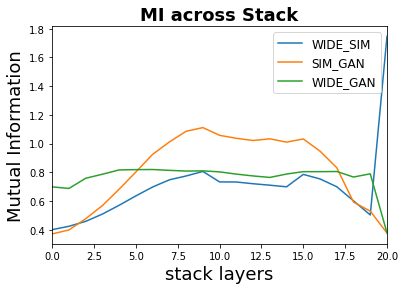

In [89]:
df.plot(y=['mi_ground_input','mi_ground_predict','mi_input_predict'])
plt.legend(['WIDE_SIM', 'SIM_GAN','WIDE_GAN'],fontsize=12)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mutual Information',fontsize=18)
plt.title('MI across Stack',fontsize=18,fontweight='bold')
plt.savefig('MI1.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
for example_input, example_target in test_dataset.take(1):
    prediction = generator(example_input, training=True)
    display_list = [example_input[0], example_target[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    inputim_l=display_list[0]
    ground_l=display_list[1]
    predict_l=display_list[2]

    j=0
    ground_g=ground_l[:,:,j]*0.5+0.5
    inputim_g=inputim_l[:,:,j]*0.5+0.5
    predict_g=predict_l[:,:,j]*0.5+0.5
    print(ground_g.numpy())
    print(np.histogram2d(ground_g.numpy().ravel(),inputim_g.numpy().ravel()))
#     hist_2d_gi, x_edges, y_edges = np.histogram2d(tf.reshape(inputim_g,[256,256]).numpy(),tf.reshape(ground_g,[256,256]).numpy(),bins=20)
#     mi_gi=mutual_information(hist_2d_gi)
    

#     hist_2d_gp, x_edges, y_edges = np.histogram2d(tf.reshape(predict_g,[256,256]).numpy(),tf.reshape(ground_g,[256,256]).numpy(),bins=20)
#     mi_gp=mutual_information(hist_2d_gp)
   
#     hist_2d_ip, x_edges, y_edges = np.histogram2d(tf.reshape(predict_g,[256,256]).numpy(),tf.reshape(inputim_g,[256,256]),bins=20)
#     mi_ip=mutual_information(hist_2d_ip)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.         0.00392157 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00392157 0.00784314 0.00784314 ... 0.00784314 0.00784314 0.01176471]
 [0.00784314 0.00784314 0.01176471 ... 0.00392157 0.01176471 0.00784314]
 [0.01176471 0.00392157 0.00392157 ... 0.00392157 0.01176471 0.00392157]]
(array([[7.527e+03, 5.260e+02, 3.290e+02, 1.540e+02, 1.780e+02, 3.310e+02,
        3.580e+02, 1.024e+03, 8.510e+02, 1.610e+02],
       [1.506e+03, 1.497e+03, 1.232e+03, 9.270e+02, 1.091e+03, 2.712e+03,
        2.618e+03, 7.605e+03, 5.335e+03, 8.380e+02],
       [2.100e+01, 4.020e+02, 8.330e+02, 6.480e+02, 8.220e+02, 2.389e+03,
        3.055e+03, 6.634e+03, 3.339e+03, 3.340e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.300e+01, 3.330e+02, 4.200e

In [ ]:
def cal_mi(filename):
    directory=r'/home/hzhuge/Documents/phantom_stack/test_new4'
    
    for j in range(0,21):
        
    fname1='phantom3d_1_sub31_Ground Truth_d='+str(j+1)'.png'
    gd_name=os.path.join(directory, fname1)
    sim=cv2.imread(gd_name)
    
    fname2='phantom3d_1_sub31_Input Image_d='+str(j+1)'.png'
    ip_name=os.path.join(directory, fname2)
    wide=cv2.imread(ip_name)
    
    fname3='phantom3d_1_sub31_Predicted Image_d='+str(j+1)'.png'
    pd_name=os.path.join(directory, fname3)
    gan=cv2.imread(pd_name)

## sim vs. wide-field
#     mgi=np.square(np.subtract(normalize(sim), normalize(wide))).mean()
#     (sgi,diff)=compare_ssim(normalize(sim),normalize(wide),full=True)
    hist_2d_gi, x_edges, y_edges = np.histogram2d(wide[:,:,0].ravel(),sim[:,:,0],bins=20)
    mi_gi=mutual_information(hist_2d_gi)
    
## sim vs. gan
#     mgp=np.square(np.subtract(normalize(sim), normalize(unet[:,:,0]))).mean()
#     (sgp,diff)=compare_ssim(normalize(sim),normalize(unet[:,:,0]),full=True)
    hist_2d_gp, x_edges, y_edges = np.histogram2d(sim[:,:,0],gan[:,:,0].ravel(),bins=20)
    mi_gp=mutual_information(hist_2d_gp)
    
## wide-field vs. unet
    mip=np.square(np.subtract(normalize(wide), normalize(unet[:,:,0]))).mean()
    (sip,diff)=compare_ssim(normalize(wide),normalize(unet[:,:,0]), full=True)
    hist_2d_ip, x_edges, y_edges = np.histogram2d(wide.ravel(),unet[:,:,0].ravel(),bins=20)
    mi_ip=mutual_information(hist_2d_ip)
    
## sim vs. gan
    mgp_g=np.square(np.subtract(normalize(sim), normalize(gan[:,:,0]))).mean()
    (sgp_g,diff)=compare_ssim(normalize(sim),normalize(gan[:,:,0]),full=True)
    hist_2d_gp_g, x_edges, y_edges = np.histogram2d(sim.ravel(),gan[:,:,0].ravel(),bins=20)
    mi_gp_g=mutual_information(hist_2d_gp_g)

## wide-field vs. gan
    mip_g=np.square(np.subtract(normalize(wide), normalize(gan[:,:,0]))).mean()
    (sip_g,diff)=compare_ssim(normalize(wide),normalize(gan[:,:,0]), full=True)
    hist_2d_ip_g, x_edges, y_edges = np.histogram2d(wide.ravel(),gan[:,:,0].ravel(),bins=20)
    mi_ip_g=mutual_information(hist_2d_ip_g)

## unet vs. gan
    mgi_g=np.square(np.subtract(normalize(unet[:,:,0]), normalize(gan[:,:,0]))).mean()
    (sgi_g,diff)=compare_ssim(normalize(unet[:,:,0]),normalize(gan[:,:,0]),full=True)
    hist_2d_gi_g, x_edges, y_edges = np.histogram2d(unet[:,:,0].ravel(),gan[:,:,0].ravel(),bins=20)
    mi_gi_g=mutual_information(hist_2d_gi_g)
    
    d={'MSE_SIM_GAN':mgp_g,
        'MSE_SIM_CNN':mgp,
       'MSE_CNN_GAN':mgi_g,
         'MSE_WIDE_GAN':mip_g,
        'MSE_WIDE_CNN':mip,
       'MSE_WIDE_SIM':mgi,
       
  'SSIM_SIM_GAN':sgp_g,
        'SSIM_SIM_CNN':sgp,
       'SSIM_CNN_GAN':sgi_g,
       'SSIM_WIDE_GAN':sip_g,
     'SSIM_WIDE_CNN':sip,
   'SSIM_WIDE_SIM':sgi,
   
   'MI_SIM_GAN':mi_gp_g,
   'MI_SIM_CNN':mi_gp,
        'MI_CNN_GAN':mi_gi_g,
       'MI_WIDE_GAN':mi_ip_g,
        'MI_WIDE_CNN':mi_ip,
   'MI_WIDE_SIM':mi_gi}
    ps=pd.Series(d).to_frame().T
    return ps

## generate image

In [54]:
n=0
for example_input, example_target in train_dataset.take(300):
  n=n+1
  model=generator
  test_input=example_input
  tar=example_target
   
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[1], tar[1], prediction[1]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
  #fig,ax = plt.subplots(21, 3, figsize=(15,15),dpi=100)
  #w,h=21,3;
 

  for j in range(0,21):
     for i in range(3):
        im=display_list[i]
        img=im[:,:,j] * 0.5 + 0.5
#         k=j
#         ax[k,i].imshow(img,cmap='gray')
#         ax[k,i].set_title(title[i]+'  d='+str(j+1))
#         ax[k,i].axis('off')
#         ax[k,i].autoscale(enable=True) 
        
        directory = r'/home/hzhuge/Documents/phantom_stack/training_checkpoints_phantom21/test_21channel/'
        filename='t'+str(n)+'_'+title[i]+'_d='+str(j+1)+'.png' 
    
    
        plt.imsave(os.path.join(directory,filename), img,cmap='gray')


InvalidArgumentError: slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

## pollen

In [28]:
def generate_images(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    im=display_list[i]
    img=im[:,:,10] * 0.5 + 0.5
    plt.imshow(img,cmap='gray')
    print(np.max(img))
    print(np.min(img))
    plt.axis('off')
  plt.show()

0.019607842
0.0039215684
0.019607842
0.0
0.024313003
0.0


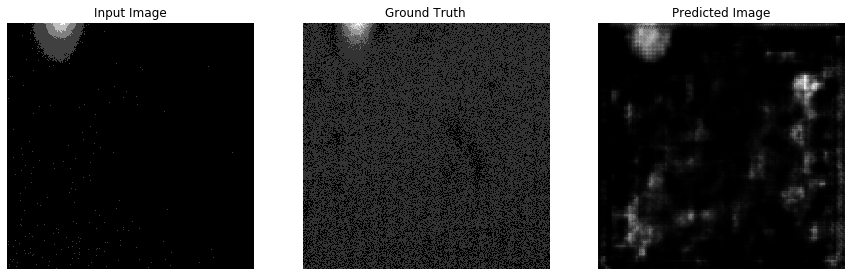

0.035294116
0.0039215684
0.027450979
0.0
0.028720975
0.0


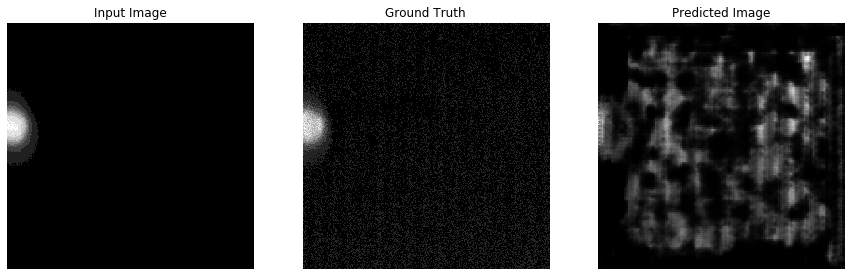

0.019607842
0.0039215684
0.011764705
0.0
0.017334253
5.9604645e-08


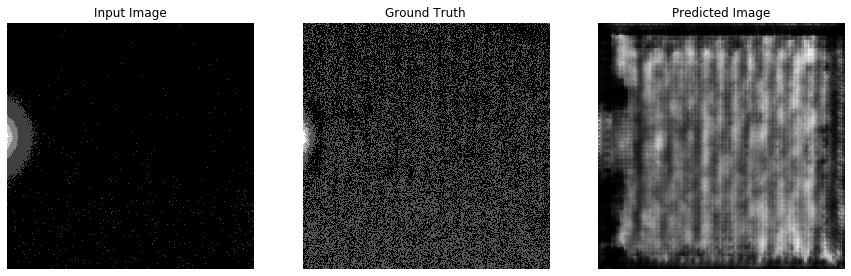

0.019607842
0.0039215684
0.015686274
0.0
0.036667883
0.0


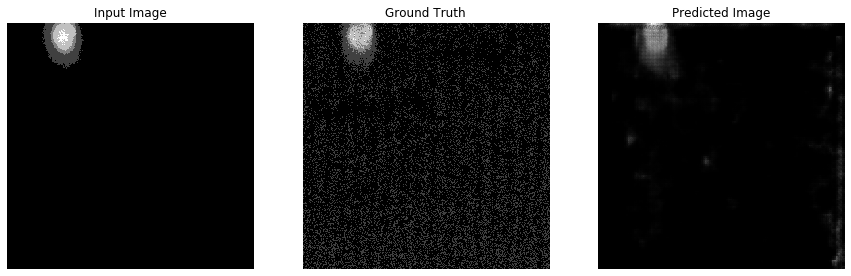

0.09411764
0.0039215684
0.04705882
0.0
0.022150606
2.9802322e-08


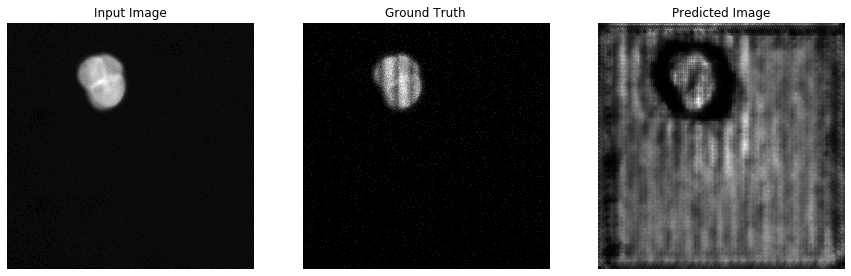

In [32]:
for example_input, example_target in test_dataset_pollen.take(5):
  generate_images(generator, example_input, example_target)

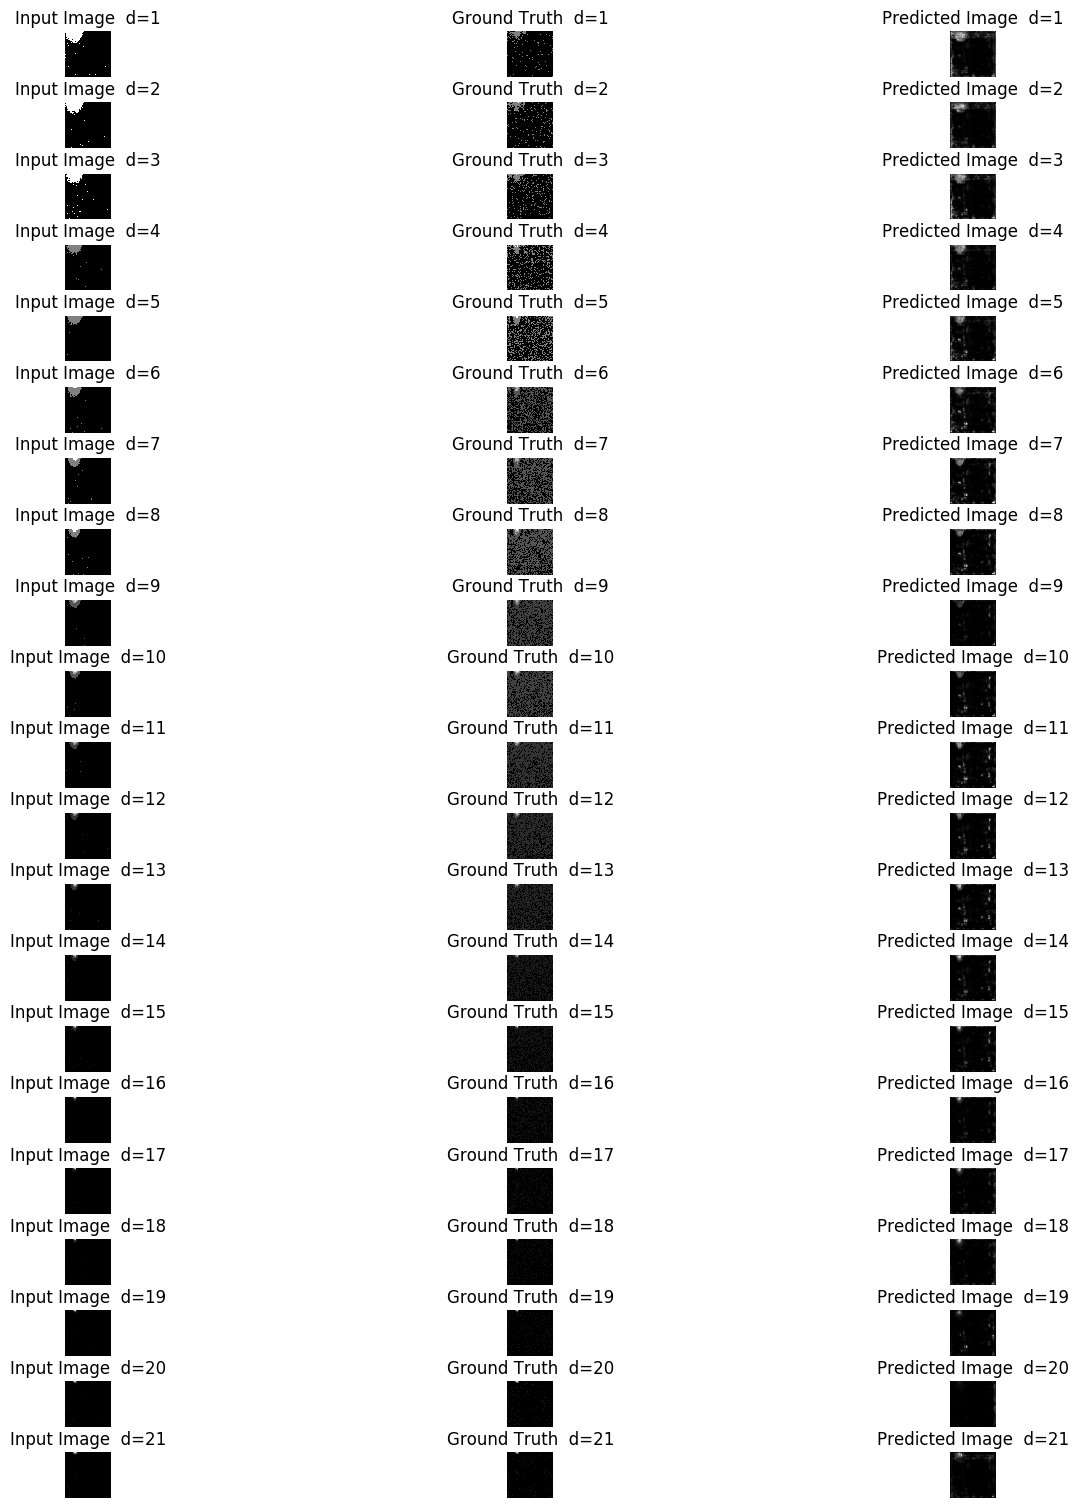

In [42]:
for example_input, example_target in test_dataset_pollen.take(1):
  matrix_mean=generate_images_stack(generator, example_input, example_target)

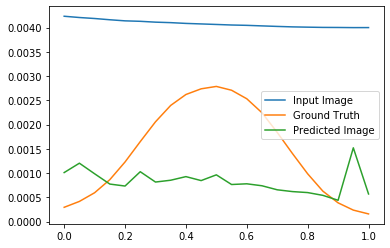

In [43]:
matrix_mean
x = np.linspace(0, 1, 21)
plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[2])
plt.legend(['Input Image', 'Ground Truth', 'Predicted Image'])

In [37]:
for example_input, example_target in test_dataset_pollen.take(1):
  df=generate_images_ssim(generator, example_input, example_target)

ave=df.mean(axis = 0)
ave

mse_ground_input       0.000011
mse_ground_predict     0.000008
mse_input_predict      0.000014
ssim_ground_input      0.930046
ssim_ground_predict    0.968655
ssim_input_predict     0.892005
dtype: float64

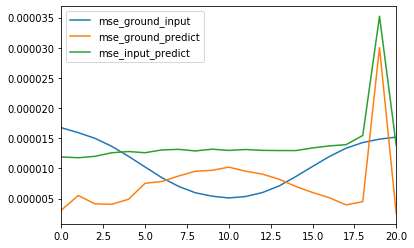

In [38]:
df.plot(y=['mse_ground_input','mse_ground_predict','mse_input_predict'])

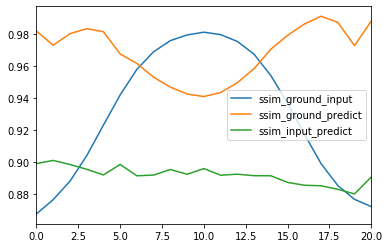

In [39]:
df.plot(y=['ssim_ground_input','ssim_ground_predict','ssim_input_predict'])

## pollen resize

0.16470587
0.0039215684
0.1490196
0.0
0.04444796
0.0


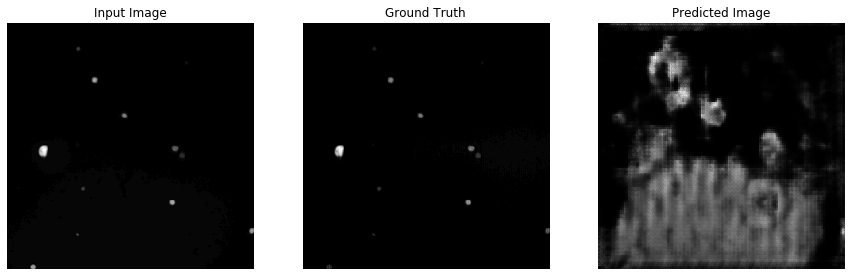

0.12156862
0.0039215684
0.086274505
0.0
0.039458334
0.0


0.11372548
0.0039215684
0.06666666
0.0
0.033344537
0.0


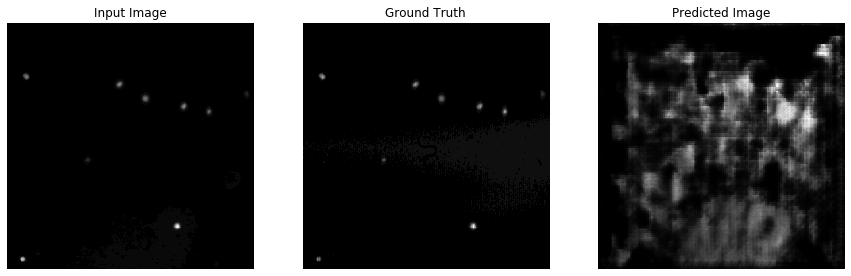

0.109803915
0.0039215684
0.0745098
0.0
0.026976764
0.0


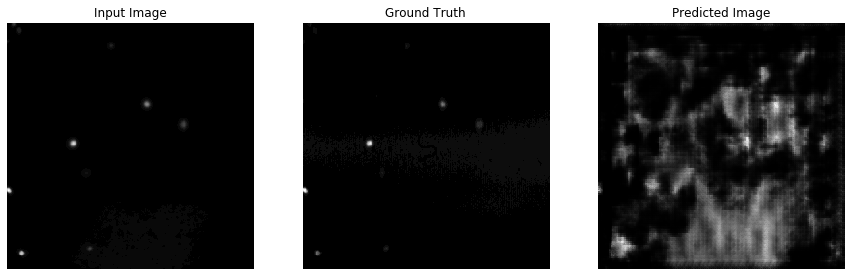

0.086274505
0.0039215684
0.086274505
0.0
0.029514223
0.0


0.11372548
0.0039215684
0.043137252
0.0
0.046571195
0.0


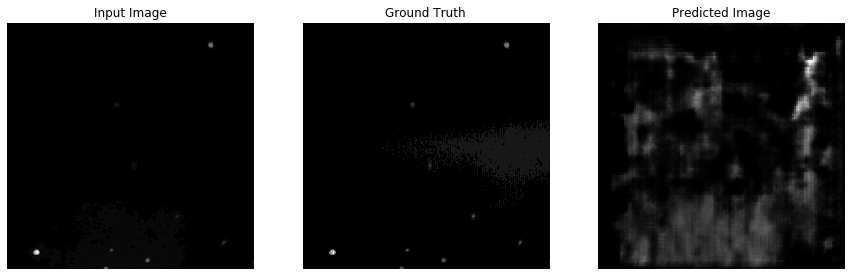

In [35]:
for example_input, example_target in test_dataset_pollen_resize.take(10):
  generate_images(generator, example_input, example_target)

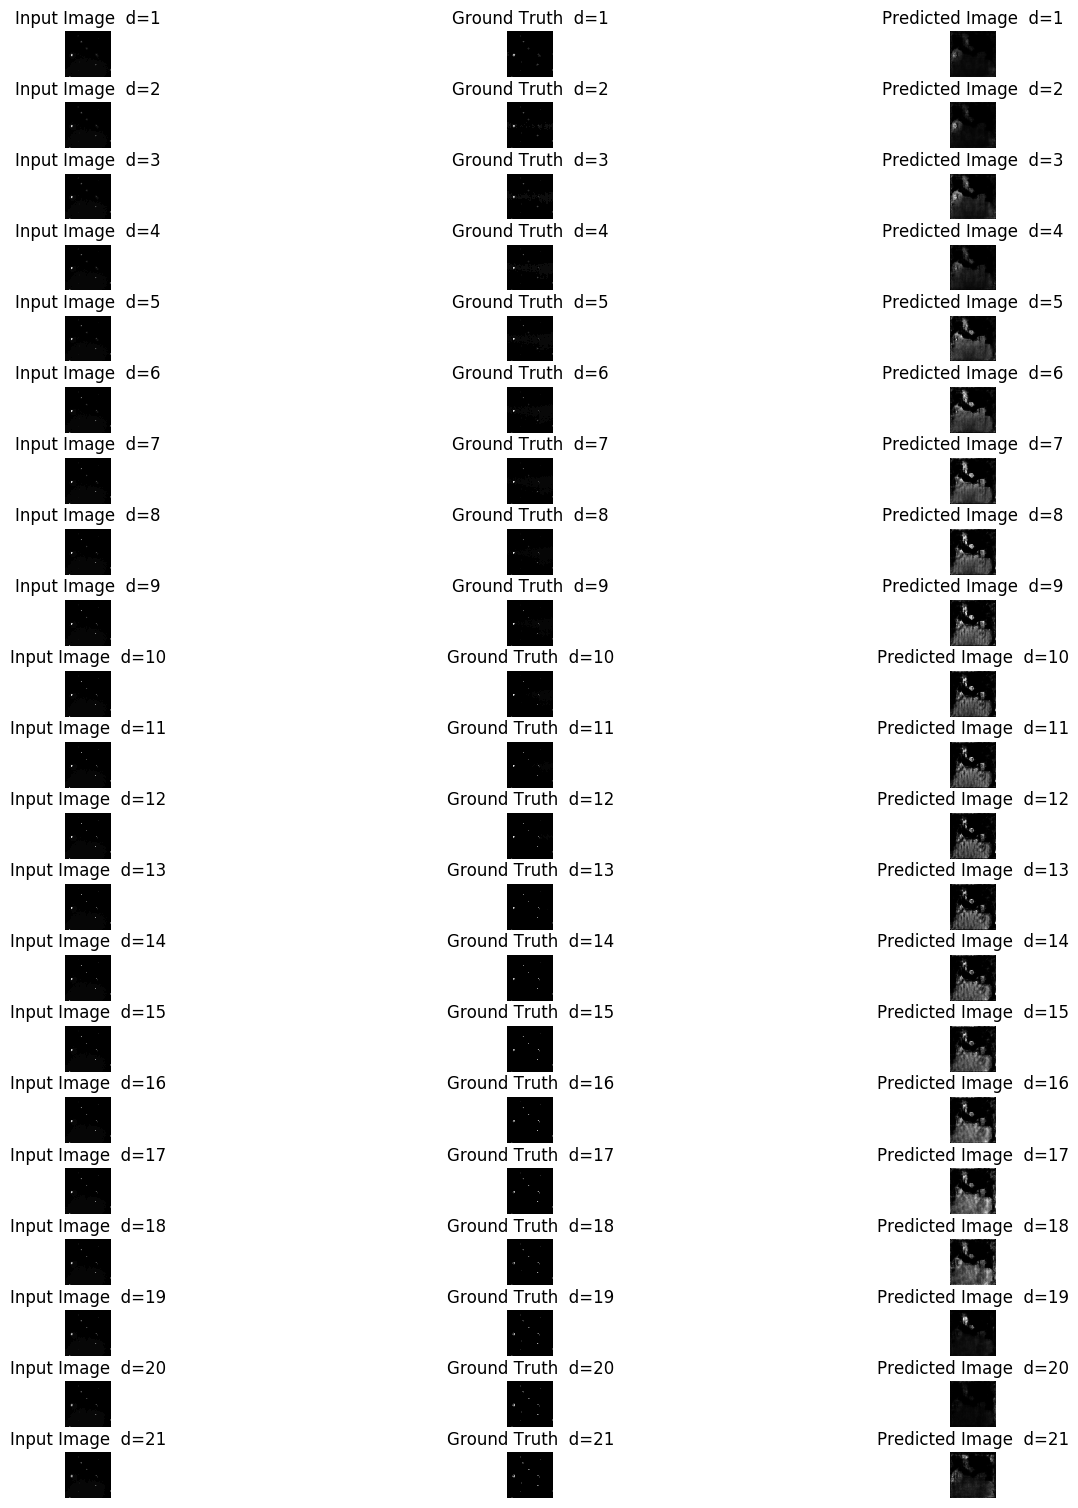

In [45]:
for example_input, example_target in test_dataset_pollen_resize.take(1):
  matrix_mean=generate_images_stack(generator, example_input, example_target)

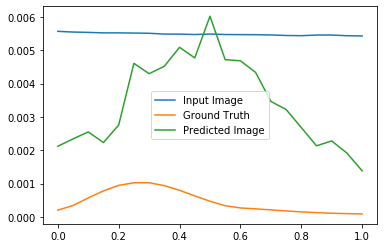

In [46]:
matrix_mean
x = np.linspace(0, 1, 21)
plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[2])
plt.legend(['Input Image', 'Ground Truth', 'Predicted Image'])

In [47]:
for example_input, example_target in test_dataset_pollen.take(1):
  df=generate_images_ssim(generator, example_input, example_target)

ave=df.mean(axis = 0)
ave

mse_ground_input       0.000011
mse_ground_predict     0.000008
mse_input_predict      0.000014
ssim_ground_input      0.930046
ssim_ground_predict    0.968437
ssim_input_predict     0.891615
dtype: float64

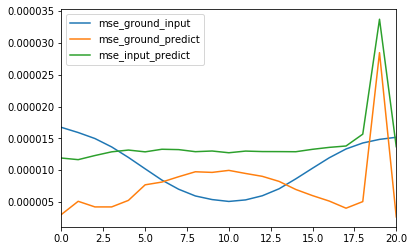

In [48]:
df.plot(y=['mse_ground_input','mse_ground_predict','mse_input_predict'])

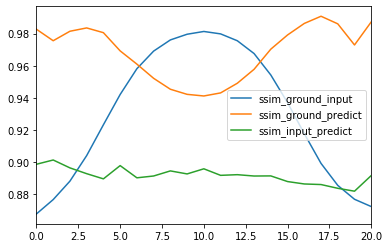

In [49]:
df.plot(y=['ssim_ground_input','ssim_ground_predict','ssim_input_predict'])

## prostate resize

In [29]:
def generate_images(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    im=display_list[i]
    img=im[:,:,10] * 0.5 + 0.5
    plt.imshow(img,cmap='gray')
    plt.axis('off')
  plt.show()

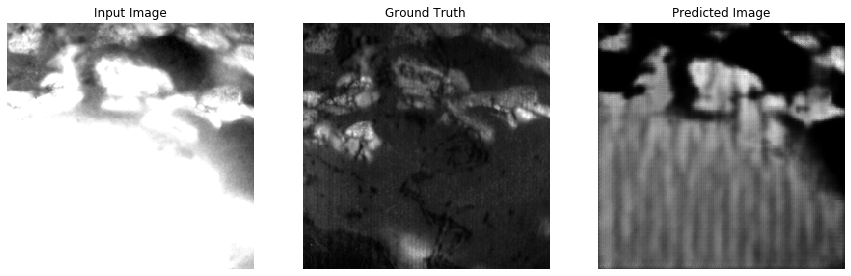

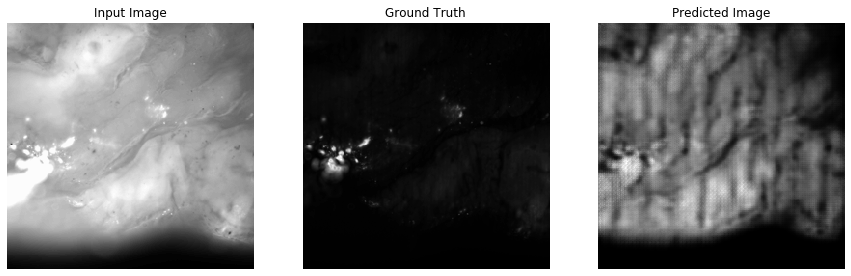

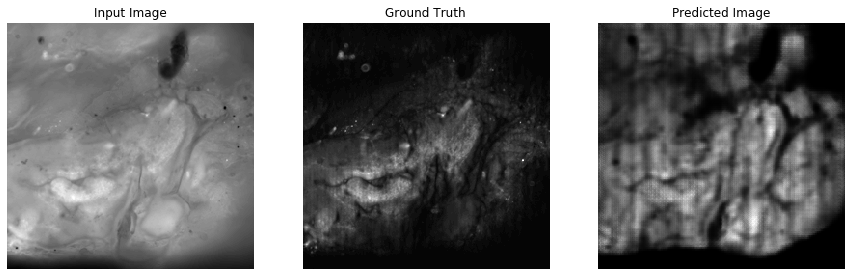

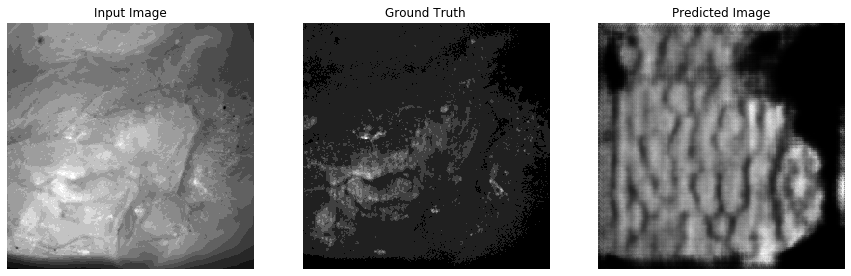

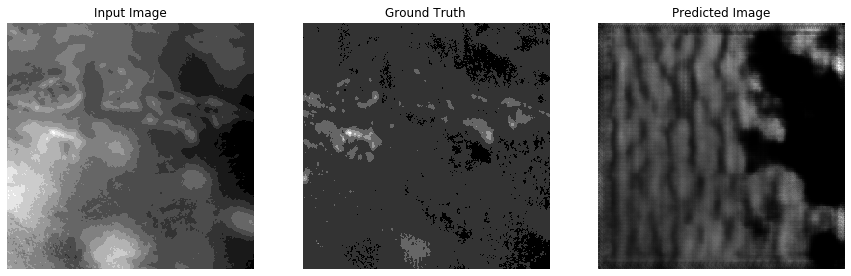

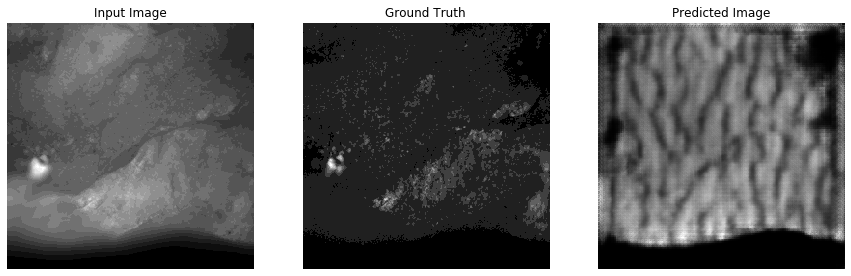

In [30]:
for example_input, example_target in test_dataset_prostate_resize:
  generate_images(generator, example_input, example_target)

## generate image

In [56]:
import re

test_name = list()
datadir='/home/hzhuge/Documents/phantom_stack/test_new3/'
for file in os.listdir(datadir):
    if file.endswith(".mat"):
        file_name=os.path.join(datadir,file)
        test_name.append(file_name)
        
subname=list()

for filename in test_name:
    
  
  res=re.split("[/.]",filename)[-2]
  subname.append(res)  

In [57]:
def generate_images_stack(model, test_input, tar,index):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
  #fig,ax = plt.subplots(21, 3, figsize=(15,15),dpi=100)
  #w,h=21,3;
 

  for j in range(0,21):
     for i in range(3):
        im=display_list[i]
        img=im[:,:,j] * 0.5 + 0.5
#         k=j
#         ax[k,i].imshow(img,cmap='gray')
#         ax[k,i].set_title(title[i]+'  d='+str(j+1))
#         ax[k,i].axis('off')
#         ax[k,i].autoscale(enable=True) 
        
        directory = r'/home/hzhuge/Documents/phantom_stack/test_new4'
        filename=subname[index]+'_'+title[i]+'_d='+str(j+1)+'.png' 
    
    
        plt.imsave(os.path.join(directory,filename), img,cmap='gray')
#   plt.tight_layout(pad=0.4, w_pad=0.001, h_pad=0.2)
#   plt.show()

In [58]:
i=0
for example_input, example_target in test_dataset:
     generate_images_stack(generator, example_input, example_target,i)
     i=i+1   

## 0610

In [24]:
test_name = list()
datadir='/home/hzhuge/Documents/phantom_stack/input1/'
for file in os.listdir(datadir):
    if file.endswith(".mat"):
        file_name=os.path.join(datadir,file)
        test_name.append(file_name)

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

tfrecords_filename = 'phantom_slide_input.tfrecords'

writer = tf.io.TFRecordWriter(tfrecords_filename)

for img_path in test_name:
    mat_contents = sio.loadmat(img_path)
    image = mat_contents['newI']
    w = image.shape[1]

    w = w // 2
      
    real_data = image[:, :w,:]
    input_data = image[:, w:,:]
        
    
    input_string=input_data.tostring()
    real_string=real_data.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(w),
        'width': _int64_feature(w),
        'input': _bytes_feature(input_string),
        'target': _bytes_feature(real_string)}))
        
    writer.write(example.SerializeToString())

writer.close()

<ipython-input-24-82c1a5689a87>:33: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  input_string=input_data.tostring()
<ipython-input-24-82c1a5689a87>:34: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  real_string=real_data.tostring()


In [25]:
tfrecords_filename_test = 'phantom_slide_input.tfrecords'
test_dataset = tf.data.TFRecordDataset(tfrecords_filename_test)
test_dataset = test_dataset.map(read_and_decode)
test_dataset=test_dataset.batch(BATCH_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [26]:
from tifffile import imread
cnn = imread('/home/hzhuge/Downloads/CSBDeep-master/examples/denoising3D/results/phantom3d_2_sub23.tif')
temo=imread('/home/hzhuge/Documents/phantom_stack/Phantom_2dto3d.tif')

In [27]:
cnn=(cnn/127.5)-1
temo=(temo/127.5)-1

In [47]:
cnn.shape

(21, 256, 256)

In [49]:
temo=temo[:,:,:,1]
temo.shape

(21, 256, 256)

In [50]:
def generate_images_measure_mean(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]

  w,h=21,5;
  matrix_mean=[[0 for x in range(w)] for y in range(h)]

  for j in range(0,21):
     for i in range(3):
        im=display_list[i]
        img=im[:,:,j] * 0.5 + 0.5
        matrix_mean[i][j]=np.mean(img)
     matrix_mean[3][j]=np.mean(cnn[j]*0.5+0.5)
     matrix_mean[4][j]=np.mean(temo[j]*0.5+0.5)
  return matrix_mean


In [51]:
array_mean = []
i=0
for example_input, example_target in test_dataset:
  matrix_mean=generate_images_measure_mean(generator, example_input, example_target) 
  array_mean.append(matrix_mean)
  i=i+1

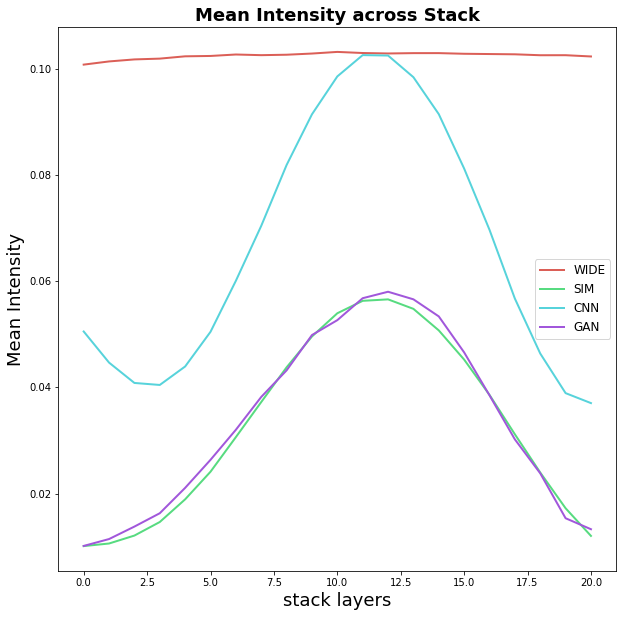

In [100]:
x=range(21)

plt.figure(figsize=(10,10))
plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[3],x,matrix_mean[2],linewidth=2.0)
#sns.color_palette("hls", 4)
plt.gca().get_lines()[0].set_color((0.86, 0.3712, 0.33999999999999997))
plt.gca().get_lines()[1].set_color((0.33999999999999997, 0.86, 0.5012000000000001))
plt.gca().get_lines()[2].set_color((0.33999999999999997, 0.8287999999999999, 0.86))
plt.gca().get_lines()[3].set_color((0.6311999999999998, 0.33999999999999997, 0.86))
plt.legend(['WIDE', 'SIM','CNN','GAN'],fontsize=12)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Intensity',fontsize=18)
plt.title('Mean Intensity across Stack',fontsize=18,fontweight='bold')
plt.savefig('mean intensity NEW.png', dpi=300, bbox_inches='tight')

plt.show()

In [52]:
matrix_mean[2][18]=0.04274107-0.02

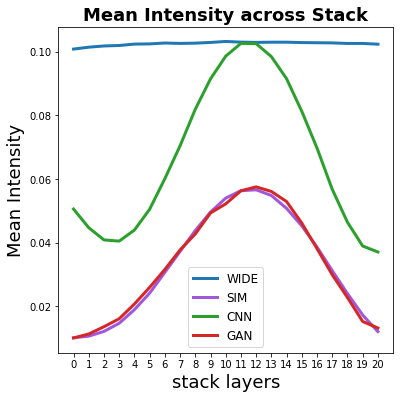

In [53]:
x=range(21)

plt.figure(figsize=(6,6))
plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[3],x,matrix_mean[2],linewidth=3)
plt.xticks(np.array(range(21)))
plt.gca().get_lines()[1].set_color((0.6311999999999998, 0.33999999999999997, 0.86))
plt.legend(['WIDE', 'SIM','CNN','GAN'],fontsize=12)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Intensity',fontsize=18)
plt.title('Mean Intensity across Stack',fontsize=18,fontweight='bold')
plt.savefig('mean intensity NEW.png', dpi=300, bbox_inches='tight')

plt.show()

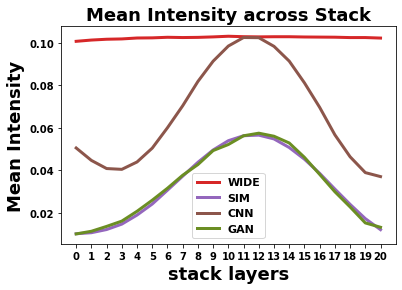

In [101]:
x=range(21)

# plt.figure(figsize=(30,20))

plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[3],x,matrix_mean[2],linewidth=3)
plt.xticks(np.array(range(21)))
plt.gca().get_lines()[0].set_color('tab:red')
plt.gca().get_lines()[1].set_color('tab:purple')
plt.gca().get_lines()[2].set_color('tab:brown')
plt.gca().get_lines()[3].set_color('olivedrab')
plt.legend(['WIDE', 'SIM','CNN','GAN'],prop=dict(weight='bold',size=11))
plt.xlabel('stack layers',fontsize=18,fontweight='bold')
plt.ylabel('Mean Intensity',fontsize=18,fontweight='bold')
plt.title('Mean Intensity across Stack',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize='10')
plt.yticks(fontweight='bold',fontsize='10')
plt.savefig('f1.png', dpi=300, bbox_inches='tight')

plt.show()

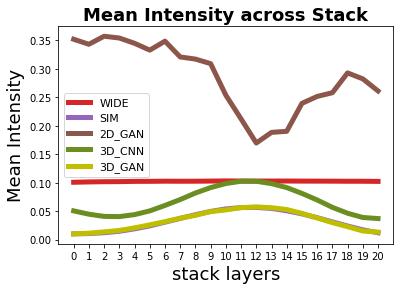

In [55]:
x=range(21)

# plt.figure(figsize=(30,20))
plt.plot(x,matrix_mean[0],x,matrix_mean[1],x,matrix_mean[4],x,matrix_mean[3],x,matrix_mean[2],linewidth=5)
plt.xticks(np.array(range(21)))
plt.gca().get_lines()[0].set_color('tab:red')
plt.gca().get_lines()[1].set_color('tab:purple')
plt.gca().get_lines()[2].set_color('tab:brown')
plt.gca().get_lines()[3].set_color('olivedrab')
plt.gca().get_lines()[4].set_color('y')
plt.legend(['WIDE', 'SIM','2D_GAN','3D_CNN','3D_GAN'],fontsize=11)
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Intensity',fontsize=18)
plt.title('Mean Intensity across Stack',fontsize=18,fontweight='bold')
# plt.savefig('mean intensity s.png', dpi=300, bbox_inches='tight')

plt.show()

In [56]:
def mutual_information(hgram):
...     """ Mutual information for joint histogram
...     """
...     # Convert bins counts to probability values
...     pxy = hgram / float(np.sum(hgram))
...     px = np.sum(pxy, axis=1) # marginal for x over y
...     py = np.sum(pxy, axis=0) # marginal for y over x
...     px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
...     # Now we can do the calculation using the pxy, px_py 2D arrays
...     nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
...     return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

In [64]:
temo=np.float32(temo)

In [67]:
def generate_images_ssim(model, test_input, tar):
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  #plt.figure(figsize=(15,15))
  

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image_GAN','Predicted Image_CNN']
  inputim_l=display_list[0]
  ground_l=display_list[1]
  predict_l=display_list[2]
  
    
  mse_ground_input=[]
  mse_ground_predict=[]
  mse_input_predict=[]

  mse_ground_cnn=[]
  mse_predict_cnn=[]
  mse_input_cnn=[]
    
  ssim_ground_input=[]
  ssim_ground_predict=[]
  ssim_input_predict=[]

  ssim_ground_cnn=[]
  ssim_predict_cnn=[]
  ssim_input_cnn=[]
    
  mi_ground_input=[]
  mi_ground_predict=[]
  mi_input_predict=[]

  mi_ground_cnn=[]
  mi_predict_cnn=[]
  mi_input_cnn=[]
  
  mse_ground_2d=[]
  ssim_ground_2d=[]
  mi_ground_2d=[]
    
  for j in range(0,21):
        
        ground_g=ground_l[:,:,j]*0.5+0.5
       
        #ground_g = cv2.cvtColor(ground,cv2.COLOR_BGR2GRAY)
        inputim_g=inputim_l[:,:,j]*0.5+0.5
 
        #inputim_g= cv2.cvtColor(inputim,cv2.COLOR_BGR2GRAY)
        predict_g=predict_l[:,:,j]*0.5+0.5
        
        cnn_g=cnn[j]*0.5+0.5
        #predict_g = cv2.cvtColor(predict,cv2.COLOR_BGR2GRAY)
        d_g=temo[j]*0.5+0.5
        
        # sim vs. 2d gan
        mgd=np.square(np.subtract(ground_g, d_g)).mean()
        sgd=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(d_g,2), max_val=1.0).numpy()
        hist_2d_gd, x_edges, y_edges = np.histogram2d(np.array(d_g).ravel(),np.array(ground_g).ravel(),bins=20)
        mi_gd=mutual_information(hist_2d_gd)
        
        mse_ground_2d.append(mgd)
        ssim_ground_2d.append(sgd)
        mi_ground_2d.append(mi_gd)
        
        # sim vs. wide-field
        mgi=np.square(np.subtract(ground_g, inputim_g)).mean()
        sgi=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(inputim_g,2), max_val=1.0).numpy()
        hist_2d_gi, x_edges, y_edges = np.histogram2d(np.array(inputim_g).ravel(),np.array(ground_g).ravel(),bins=20)
        mi_gi=mutual_information(hist_2d_gi)

        mse_ground_input.append(mgi)
        ssim_ground_input.append(sgi)
        mi_ground_input.append(mi_gi)
       
        # sim vs. gan
        mgp=np.square(np.subtract(ground_g, predict_g)).mean()
        sgp=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
        hist_2d_gp, x_edges, y_edges = np.histogram2d(np.array(predict_g).ravel(),np.array(ground_g).ravel(),bins=20)
        mi_gp=mutual_information(hist_2d_gp)
       
        mse_ground_predict.append(mgp)
        ssim_ground_predict.append(sgp)
        mi_ground_predict.append(mi_gp)
        
        # sim vs. cnn
        mgc=np.square(np.subtract(ground_g, cnn_g)).mean()
        sgc=tf.image.ssim(tf.expand_dims(ground_g,2),tf.expand_dims(cnn_g,2), max_val=1.0).numpy()
        hist_2d_gc, x_edges, y_edges = np.histogram2d(np.array(cnn_g).ravel(),np.array(ground_g).ravel(),bins=20)
        mi_gc=mutual_information(hist_2d_gc)
        
        mse_ground_cnn.append(mgc)
        ssim_ground_cnn.append(sgc)
        mi_ground_cnn.append(mi_gc)
        
        # wide_field vs.gan
        mip=np.square(np.subtract(inputim_g, predict_g)).mean()
        sip=tf.image.ssim(tf.expand_dims(inputim_g,2),tf.expand_dims(predict_g,2), max_val=1.0).numpy()
        hist_2d_ip, x_edges, y_edges = np.histogram2d(np.array(inputim_g).ravel(),np.array(predict_g).ravel(),bins=20)
        mi_ip=mutual_information(hist_2d_ip)
    
        mse_input_predict.append(mip)
        ssim_input_predict.append(sip)
        mi_input_predict.append(mi_ip)
        
        # wide_field vs.cnn
        mic=np.square(np.subtract(inputim_g, cnn_g)).mean()
        sic=tf.image.ssim(tf.expand_dims(inputim_g,2),tf.expand_dims(cnn_g,2), max_val=1.0).numpy()
        hist_2d_ic, x_edges, y_edges = np.histogram2d(np.array(inputim_g).ravel(),np.array(cnn_g).ravel(),bins=20)
        mi_ic=mutual_information(hist_2d_ic)
        
        mse_input_cnn.append(mic)
        ssim_input_cnn.append(sic)
        mi_input_cnn.append(mi_ic)

        # gan vs.cnn
        mpc=np.square(np.subtract(predict_g, cnn_g)).mean()
        spc=tf.image.ssim(tf.expand_dims(predict_g,2),tf.expand_dims(cnn_g,2), max_val=1.0).numpy()
        hist_2d_pc, x_edges, y_edges = np.histogram2d(np.array(predict_g).ravel(),np.array(cnn_g).ravel(),bins=20)
        mi_pc=mutual_information(hist_2d_pc)
        
        mse_predict_cnn.append(mpc)
        ssim_predict_cnn.append(spc)
        mi_predict_cnn.append(mi_pc)
    
  df = pd.DataFrame(list(zip(mse_ground_predict,mse_ground_cnn,mse_predict_cnn,mse_input_predict,mse_input_cnn,mse_ground_input,mse_ground_2d,
ssim_ground_predict,ssim_ground_cnn,ssim_predict_cnn,ssim_input_predict,ssim_input_cnn,ssim_ground_input,ssim_ground_2d,
mi_ground_predict,mi_ground_cnn,mi_predict_cnn,mi_input_predict,mi_input_cnn,mi_ground_input,mi_ground_2d)), columns =[
      'MSE_SIM_GAN',
     'MSE_SIM_CNN',
     'MSE_CNN_GAN',
     'MSE_WIDE_GAN',
     'MSE_WIDE_CNN',
     'MSE_WIDE_SIM',
     'MSE_SIM_2D',
      
     'SSIM_SIM_GAN',
     'SSIM_SIM_CNN',
     'SSIM_CNN_GAN',
     'SSIM_WIDE_GAN',
     'SSIM_WIDE_CNN',
     'SSIM_WIDE_SIM',
     'SSIM_SIM_2D',
      
     'MI_SIM_GAN',
     'MI_SIM_CNN',
     'MI_CNN_GAN',
     'MI_WIDE_GAN',
     'MI_WIDE_CNN',
     'MI_WIDE_SIM',
     'MI_SIM_2D']) 
#   d={
     
#      'MSE_SIM_GAN':mse_ground_predict,
#      'MSE_SIM_CNN':mse_ground_cnn,
#      'MSE_CNN_GAN':mse_predict_cnn,
#      'MSE_WIDE_GAN':mse_input_predict,
#      'MSE_WIDE_CNN':mse_input_cnn,
#      'MSE_WIDE_SIM':mse_ground_input,

#      'SSIM_SIM_GAN':ssim_ground_predict,
#      'SSIM_SIM_CNN':ssim_ground_cnn,
#      'SSIM_CNN_GAN':ssim_predict_cnn,
#      'SSIM_WIDE_GAN':ssim_input_predict,
#      'SSIM_WIDE_CNN':ssim_input_cnn,
#      'SSIM_WIDE_SIM':ssim_ground_input,

      
#      'MI_SIM_GAN':mi_ground_predict,
#      'MI_SIM_CNN':mi_ground_cnn,
#      'MI_CNN_GAN':mi_predict_cnn,
#      'MI_WIDE_GAN':mi_input_predict,
#      'MI_WIDE_CNN':mi_input_cnn,
#      'MI_WIDE_SIM':mi_ground_input,
# }
#   ps=pd.Series(d).to_frame().T
  return df

     

In [68]:
for example_input, example_target in test_dataset.take(1):
  df=generate_images_ssim(generator, example_input, example_target)

ave=df.mean(axis = 0)
ave

MSE_SIM_GAN      0.000064
MSE_SIM_CNN      0.001711
MSE_CNN_GAN      0.001635
MSE_WIDE_GAN     0.006738
MSE_WIDE_CNN     0.003178
MSE_WIDE_SIM     0.006984
MSE_SIM_2D       0.103005
SSIM_SIM_GAN     0.964476
SSIM_SIM_CNN     0.733755
SSIM_CNN_GAN     0.748115
SSIM_WIDE_GAN    0.538833
SSIM_WIDE_CNN    0.795997
SSIM_WIDE_SIM    0.531260
SSIM_SIM_2D      0.299917
MI_SIM_GAN       1.158740
MI_SIM_CNN       0.897454
MI_CNN_GAN       0.972333
MI_WIDE_GAN      0.736829
MI_WIDE_CNN      0.806154
MI_WIDE_SIM      0.647327
MI_SIM_2D        0.672067
dtype: float64

In [69]:
df1=df.copy()
df1.iloc[18]['MSE_SIM_GAN']=0.000061
df1.iloc[18]['MSE_WIDE_GAN']=0.004789+0.0035
df1.iloc[18]['MSE_CNN_GAN']=0.000189+0.0006
df1.iloc[18]['SSIM_SIM_GAN']=0.853312+0.1
df1.iloc[18]['SSIM_WIDE_GAN']=0.683489-0.2
df1.iloc[18]['SSIM_CNN_GAN']=0.920812-0.15
df1.iloc[18]['MI_SIM_GAN']=0.899721+0.1
df1.iloc[18]['MI_WIDE_GAN']=0.817246-0.12

In [41]:
df1.to_csv('phantom3d_new4_2_sub23.csv')

In [2]:
df1=pd.read_csv('phantom3d_new4_2_sub23.csv')

<Figure size 2160x1440 with 0 Axes>

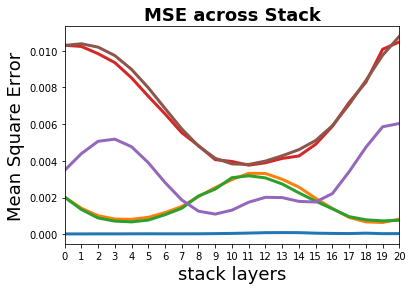

In [42]:

plt.figure(figsize=(30,20))
df1.plot(y=['MSE_SIM_GAN','MSE_SIM_CNN','MSE_CNN_GAN','MSE_WIDE_GAN','MSE_WIDE_CNN','MSE_WIDE_SIM'],linewidth=3,legend=None)
# plt.legend(['SIM_GAN','SIM_CNN','CNN_GAN','WIDE_GAN','WIDE_CNN','WIDE_SIM'],fontsize=12)
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Square Error',fontsize=18)
plt.title('MSE across Stack',fontsize=18,fontweight='bold')
plt.savefig('MSE new_nolegend.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 2160x2160 with 0 Axes>

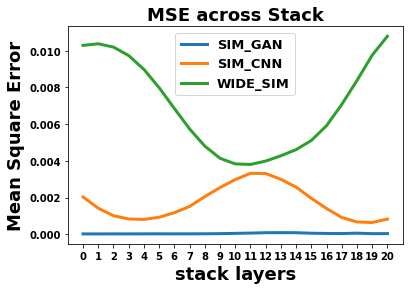

In [102]:
plt.figure(figsize=(30,30))
df1.plot(y=['MSE_SIM_GAN','MSE_SIM_CNN','MSE_WIDE_SIM'],linewidth=3)
plt.legend(['SIM_GAN','SIM_CNN','WIDE_SIM'],prop=dict(weight='bold',size=13))
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18,fontweight='bold')
plt.ylabel('Mean Square Error',fontsize=18,fontweight='bold')
plt.title('MSE across Stack',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize='10')
plt.yticks(fontweight='bold',fontsize='10')
plt.savefig('f2.png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
plt.figure(figsize=(30,30))
df1.plot(y=['MSE_SIM_GAN','MSE_SIM_CNN','MSE_WIDE_SIM','MSE_SIM_2D'],linewidth=3)
plt.legend(['SIM_GAN','SIM_CNN','WIDE_SIM','SIM_2D'],fontsize=12)
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mean Square Error',fontsize=18)
plt.title('MSE across Stack',fontsize=18,fontweight='bold')
# plt.savefig('MSE s.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

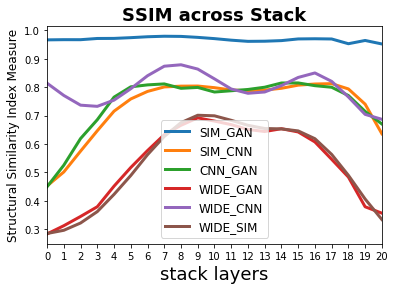

In [184]:
plt.figure(figsize=(30,30))
df1.plot(y=['SSIM_SIM_GAN','SSIM_SIM_CNN','SSIM_CNN_GAN','SSIM_WIDE_GAN','SSIM_WIDE_CNN','SSIM_WIDE_SIM'],linewidth=3)
plt.legend(['SIM_GAN','SIM_CNN','CNN_GAN','WIDE_GAN','WIDE_CNN','WIDE_SIM'],fontsize=12)
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Structural Similarity Index Measure',fontsize=12)
plt.title('SSIM across Stack',fontsize=18,fontweight='bold')
plt.savefig('SSIM new.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 2160x2160 with 0 Axes>

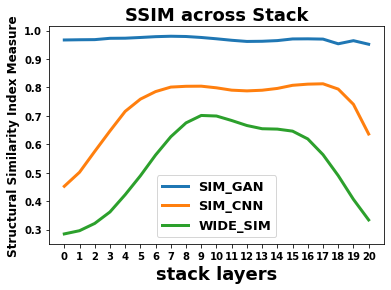

In [103]:
plt.figure(figsize=(30,30))
df1.plot(y=['SSIM_SIM_GAN','SSIM_SIM_CNN','SSIM_WIDE_SIM'],linewidth=3)
plt.legend(['SIM_GAN','SIM_CNN','WIDE_SIM'],prop=dict(weight='bold',size=13))
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18,fontweight='bold')
plt.ylabel('Structural Similarity Index Measure',fontsize=12,fontweight='bold')
plt.title('SSIM across Stack',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize='10')
plt.yticks(fontweight='bold',fontsize='10')
plt.savefig('f3.png', dpi=300, bbox_inches='tight')
plt.show()

In [71]:
plt.figure(figsize=(30,30))
df1.plot(y=['SSIM_SIM_GAN','SSIM_SIM_CNN','SSIM_WIDE_SIM','SSIM_SIM_2D'],linewidth=3)
plt.legend(['SIM_GAN','SIM_CNN','WIDE_SIM','SIM_2D'],fontsize=12)
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Structural Similarity Index Measure',fontsize=12)
plt.title('SSIM across Stack',fontsize=18,fontweight='bold')
# plt.savefig('SSIM s.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

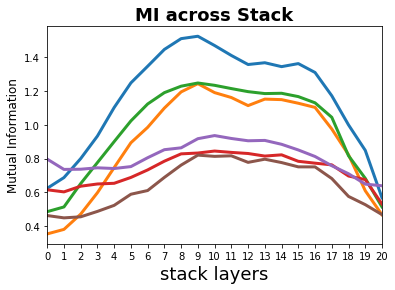

In [195]:
plt.figure(figsize=(30,30))
df1.plot(y=['MI_SIM_GAN','MI_SIM_CNN','MI_CNN_GAN','MI_WIDE_GAN','MI_WIDE_CNN','MI_WIDE_SIM'],linewidth=3,legend=None)
#plt.legend(['SIM_GAN','SIM_CNN','CNN_GAN','WIDE_GAN','WIDE_CNN','WIDE_SIM'],fontsize=12)
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mutual Information',fontsize=12)
plt.title('MI across Stack',fontsize=18,fontweight='bold')
plt.savefig('MI new_nolegend.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 2160x2160 with 0 Axes>

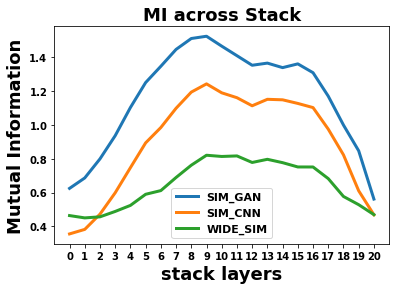

In [104]:
plt.figure(figsize=(30,30))
df1.plot(y=['MI_SIM_GAN','MI_SIM_CNN','MI_WIDE_SIM'],linewidth=3,legend=None)
plt.legend(['SIM_GAN','SIM_CNN','WIDE_SIM'],prop=dict(weight='bold',size=11))
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18,fontweight='bold')
plt.ylabel('Mutual Information',fontsize=18,fontweight='bold')
plt.title('MI across Stack',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize='10')
plt.yticks(fontweight='bold',fontsize='10')
plt.savefig('f4.png', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
plt.figure(figsize=(30,30))
df1.plot(y=['MI_SIM_GAN','MI_SIM_CNN','MI_WIDE_SIM','MI_SIM_2D'],linewidth=3,legend=None)
plt.legend(['SIM_GAN','SIM_CNN','WIDE_SIM','SIM_2D'],fontsize=12)
plt.xticks(np.array(range(21)))
plt.xlabel('stack layers',fontsize=18)
plt.ylabel('Mutual Information',fontsize=12)
plt.title('MI across Stack',fontsize=18,fontweight='bold')
# plt.savefig('MI s.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 2160x2160 with 0 Axes>